<a href="https://colab.research.google.com/github/Maqui2404/B.I./blob/main/pOSTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

# Configurar el dispositivo de PennyLane para usar el simulador cuántico
dev = qml.device("default.qubit", wires=4)

# Definir el circuito cuántico
@qml.qnode(dev)
def quantum_circuit(params, features):
    # Codificación de características
    for i in range(4):
        qml.RY(features[i], wires=i)

    # Capas parametrizadas
    for layer in range(2):
        for i in range(4):
            qml.RX(params[layer][i][0], wires=i)
            qml.RY(params[layer][i][1], wires=i)
            qml.RZ(params[layer][i][2], wires=i)

        qml.CNOT(wires=[0, 1])
        qml.CNOT(wires=[1, 2])
        qml.CNOT(wires=[2, 3])

    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

# Optimizador cuántico
class QuantumOptimizer(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01, momentum=0.9):
        defaults = dict(lr=lr, momentum=momentum)
        super(QuantumOptimizer, self).__init__(params, defaults)

        self.quantum_params = np.random.randn(2, 4, 3) # Parámetros del circuito cuántico

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Aplicar optimización cuántica
                quantum_grad = np.array(quantum_circuit(self.quantum_params, d_p.numpy().flatten()[:4]))

                # Actualizar parámetros cuánticos (no los pesos de la red neuronal clásica)
                self.quantum_params -= group['lr'] * quantum_grad # Usamos el gradiente cuántico para actualizar los parámetros cuánticos

                # Momentum para los parámetros cuánticos
                self.quantum_params += group['momentum'] * np.random.randn(*self.quantum_params.shape)

        return loss

# Modelo de red neuronal
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Función para entrenar y evaluar
def train_and_evaluate(model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs):
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)



In [2]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 64.9 MB/s eta 0:00:00



Training with Quantum optimizer:
Epoch [10/50], Train Loss: 0.7163, Test Loss: 0.6896, Train Accuracy: 0.4800, Test Accuracy: 0.5250
Epoch [20/50], Train Loss: 0.7163, Test Loss: 0.6896, Train Accuracy: 0.4800, Test Accuracy: 0.5250
Epoch [30/50], Train Loss: 0.7163, Test Loss: 0.6896, Train Accuracy: 0.4800, Test Accuracy: 0.5250
Epoch [40/50], Train Loss: 0.7163, Test Loss: 0.6896, Train Accuracy: 0.4800, Test Accuracy: 0.5250
Epoch [50/50], Train Loss: 0.7163, Test Loss: 0.6896, Train Accuracy: 0.4800, Test Accuracy: 0.5250

Training with Adam optimizer:
Epoch [10/50], Train Loss: 0.5828, Test Loss: 0.5952, Train Accuracy: 0.7225, Test Accuracy: 0.6850
Epoch [20/50], Train Loss: 0.4181, Test Loss: 0.4625, Train Accuracy: 0.8725, Test Accuracy: 0.8050
Epoch [30/50], Train Loss: 0.3098, Test Loss: 0.3880, Train Accuracy: 0.8838, Test Accuracy: 0.8200
Epoch [40/50], Train Loss: 0.2730, Test Loss: 0.3757, Train Accuracy: 0.8975, Test Accuracy: 0.8400
Epoch [50/50], Train Loss: 0.2509, 

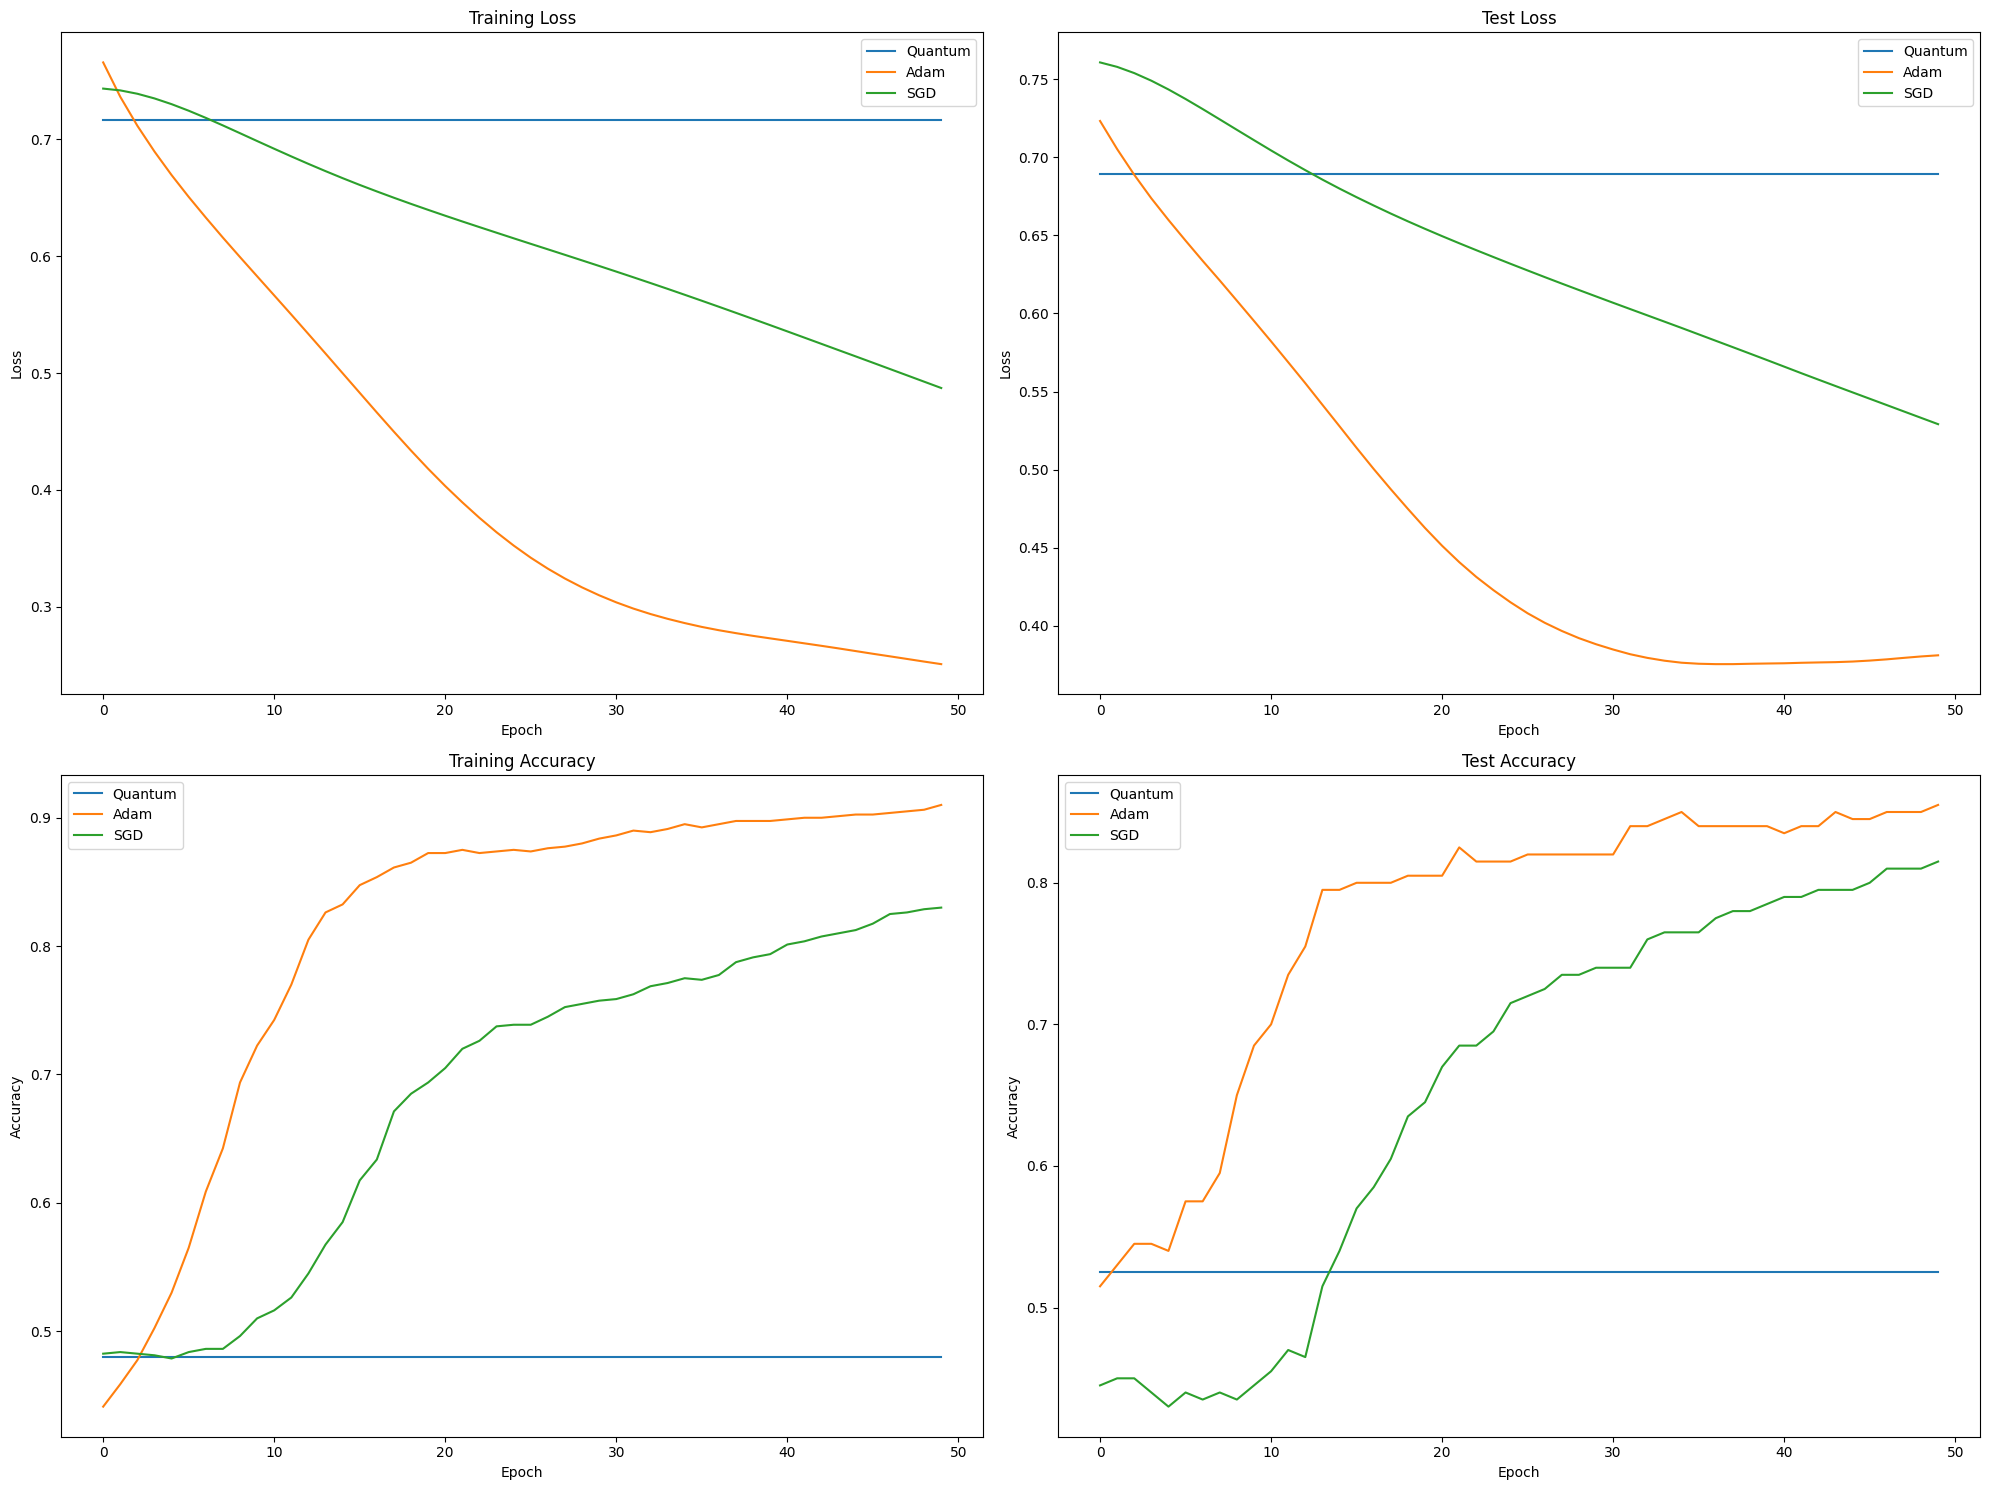


Training Times:
Quantum: 2.88 seconds
Adam: 0.20 seconds
SGD: 0.11 seconds

Final Results:
Quantum:
  Final Train Loss: 0.7163
  Final Test Loss: 0.6896
  Final Train Accuracy: 0.4800
  Final Test Accuracy: 0.5250
Adam:
  Final Train Loss: 0.2509
  Final Test Loss: 0.3809
  Final Train Accuracy: 0.9100
  Final Test Accuracy: 0.8550
SGD:
  Final Train Loss: 0.4872
  Final Test Loss: 0.5291
  Final Train Accuracy: 0.8300
  Final Test Accuracy: 0.8150


In [11]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

# Configurar el dispositivo de PennyLane para usar el simulador cuántico
dev = qml.device("default.qubit", wires=4)

# Definir el circuito cuántico
@qml.qnode(dev)
def quantum_circuit(params, features):
    # Codificación de características
    for i in range(4):
        qml.RY(features[i], wires=i)

    # Capas parametrizadas
    for layer in range(2):
        for i in range(4):
            qml.RX(params[layer][i][0], wires=i)
            qml.RY(params[layer][i][1], wires=i)
            qml.RZ(params[layer][i][2], wires=i)

        qml.CNOT(wires=[0, 1])
        qml.CNOT(wires=[1, 2])
        qml.CNOT(wires=[2, 3])

    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

# Optimizador cuántico
class QuantumOptimizer(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01, momentum=0.9):
        defaults = dict(lr=lr, momentum=momentum)
        super(QuantumOptimizer, self).__init__(params, defaults)

        self.quantum_params = np.random.randn(2, 4, 3) # Parámetros del circuito cuántico

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Redimensionar y asegurar que las dimensiones sean compatibles
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')

                # Aplicar optimización cuántica
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))

                # Redimensionar el gradiente cuántico para que coincida con los parámetros cuánticos
                # En lugar de reshaping, simplemente broadcast el gradiente para que coincida
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Actualizar parámetros cuánticos (no los pesos de la red neuronal clásica)
                self.quantum_params -= group['lr'] * quantum_grad # Usamos el gradiente cuántico para actualizar los parámetros cuánticos

                # Momentum para los parámetros cuánticos
                self.quantum_params += group['momentum'] * np.random.randn(*self.quantum_params.shape)

        return loss

# Modelo de red neuronal
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Función para entrenar y evaluar
def train_and_evaluate(model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs):
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Evaluación en conjunto de entrenamiento
        _, predicted = torch.max(outputs.data, 1)
        train_accuracy = (predicted == y_train).sum().item() / y_train.size(0)
        train_accuracies.append(train_accuracy)

        # Evaluación en conjunto de prueba
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            test_losses.append(test_loss.item())

            _, test_predicted = torch.max(test_outputs.data, 1)
            test_accuracy = (test_predicted == y_test).sum().item() / y_test.size(0)
            test_accuracies.append(test_accuracy)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, '
                  f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

    return train_losses, test_losses, train_accuracies, test_accuracies

# Generación de datos sintéticos
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conversión a tensores de PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# Parámetros del modelo
input_size = 20
hidden_size = 10
num_classes = 2
learning_rate = 0.01
epochs = 50  # Reducido debido a las limitaciones de tiempo en hardware real

# Inicialización de modelos y optimizadores
models = {
    'Quantum': (NeuralNetwork(input_size, hidden_size, num_classes),
                QuantumOptimizer),
    'Adam': (NeuralNetwork(input_size, hidden_size, num_classes),
             lambda params: optim.Adam(params, lr=learning_rate)),
    'SGD': (NeuralNetwork(input_size, hidden_size, num_classes),
            lambda params: optim.SGD(params, lr=learning_rate, momentum=0.9))
}

criterion = nn.CrossEntropyLoss()

# Entrenamiento y evaluación
results = {}
for name, (model, opt_class) in models.items():
    print(f"\nTraining with {name} optimizer:")
    optimizer = opt_class(model.parameters()) if name == 'Quantum' else opt_class(model.parameters())
    start_time = time.time()
    train_losses, test_losses, train_accuracies, test_accuracies = train_and_evaluate(
        model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs)
    end_time = time.time()

    results[name] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'train_accuracies': train_accuracies,
        'test_accuracies': test_accuracies,
        'time': end_time - start_time
    }

# Visualización de resultados
plt.figure(figsize=(20, 15))

# Gráfico de pérdida de entrenamiento
plt.subplot(2, 2, 1)
for name, data in results.items():
    plt.plot(data['train_losses'], label=name)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de pérdida de prueba
plt.subplot(2, 2, 2)
for name, data in results.items():
    plt.plot(data['test_losses'], label=name)
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de precisión de entrenamiento
plt.subplot(2, 2, 3)
for name, data in results.items():
    plt.plot(data['train_accuracies'], label=name)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de precisión de prueba
plt.subplot(2, 2, 4)
for name, data in results.items():
    plt.plot(data['test_accuracies'], label=name)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir tiempos de entrenamiento
print("\nTraining Times:")
for name, data in results.items():
    print(f"{name}: {data['time']:.2f} seconds")

# Análisis final
print("\nFinal Results:")
for name, data in results.items():
    print(f"{name}:")
    print(f"  Final Train Loss: {data['train_losses'][-1]:.4f}")
    print(f"  Final Test Loss: {data['test_losses'][-1]:.4f}")
    print(f"  Final Train Accuracy: {data['train_accuracies'][-1]:.4f}")
    print(f"  Final Test Accuracy: {data['test_accuracies'][-1]:.4f}")



Training with Quantum optimizer:
Epoch [10/50], Train Loss: 0.7387, Test Loss: 0.7410, Train Accuracy: 0.4387, Test Accuracy: 0.4450
Epoch [20/50], Train Loss: 0.7387, Test Loss: 0.7410, Train Accuracy: 0.4387, Test Accuracy: 0.4450
Epoch [30/50], Train Loss: 0.7387, Test Loss: 0.7410, Train Accuracy: 0.4387, Test Accuracy: 0.4450
Epoch [40/50], Train Loss: 0.7387, Test Loss: 0.7410, Train Accuracy: 0.4387, Test Accuracy: 0.4450
Epoch [50/50], Train Loss: 0.7387, Test Loss: 0.7410, Train Accuracy: 0.4387, Test Accuracy: 0.4450

Training with Adam optimizer:
Epoch [10/50], Train Loss: 0.6039, Test Loss: 0.6334, Train Accuracy: 0.7400, Test Accuracy: 0.6550
Epoch [20/50], Train Loss: 0.4509, Test Loss: 0.5058, Train Accuracy: 0.8462, Test Accuracy: 0.8050
Epoch [30/50], Train Loss: 0.3299, Test Loss: 0.4232, Train Accuracy: 0.8900, Test Accuracy: 0.8400
Epoch [40/50], Train Loss: 0.2799, Test Loss: 0.3982, Train Accuracy: 0.8950, Test Accuracy: 0.8550
Epoch [50/50], Train Loss: 0.2553, 

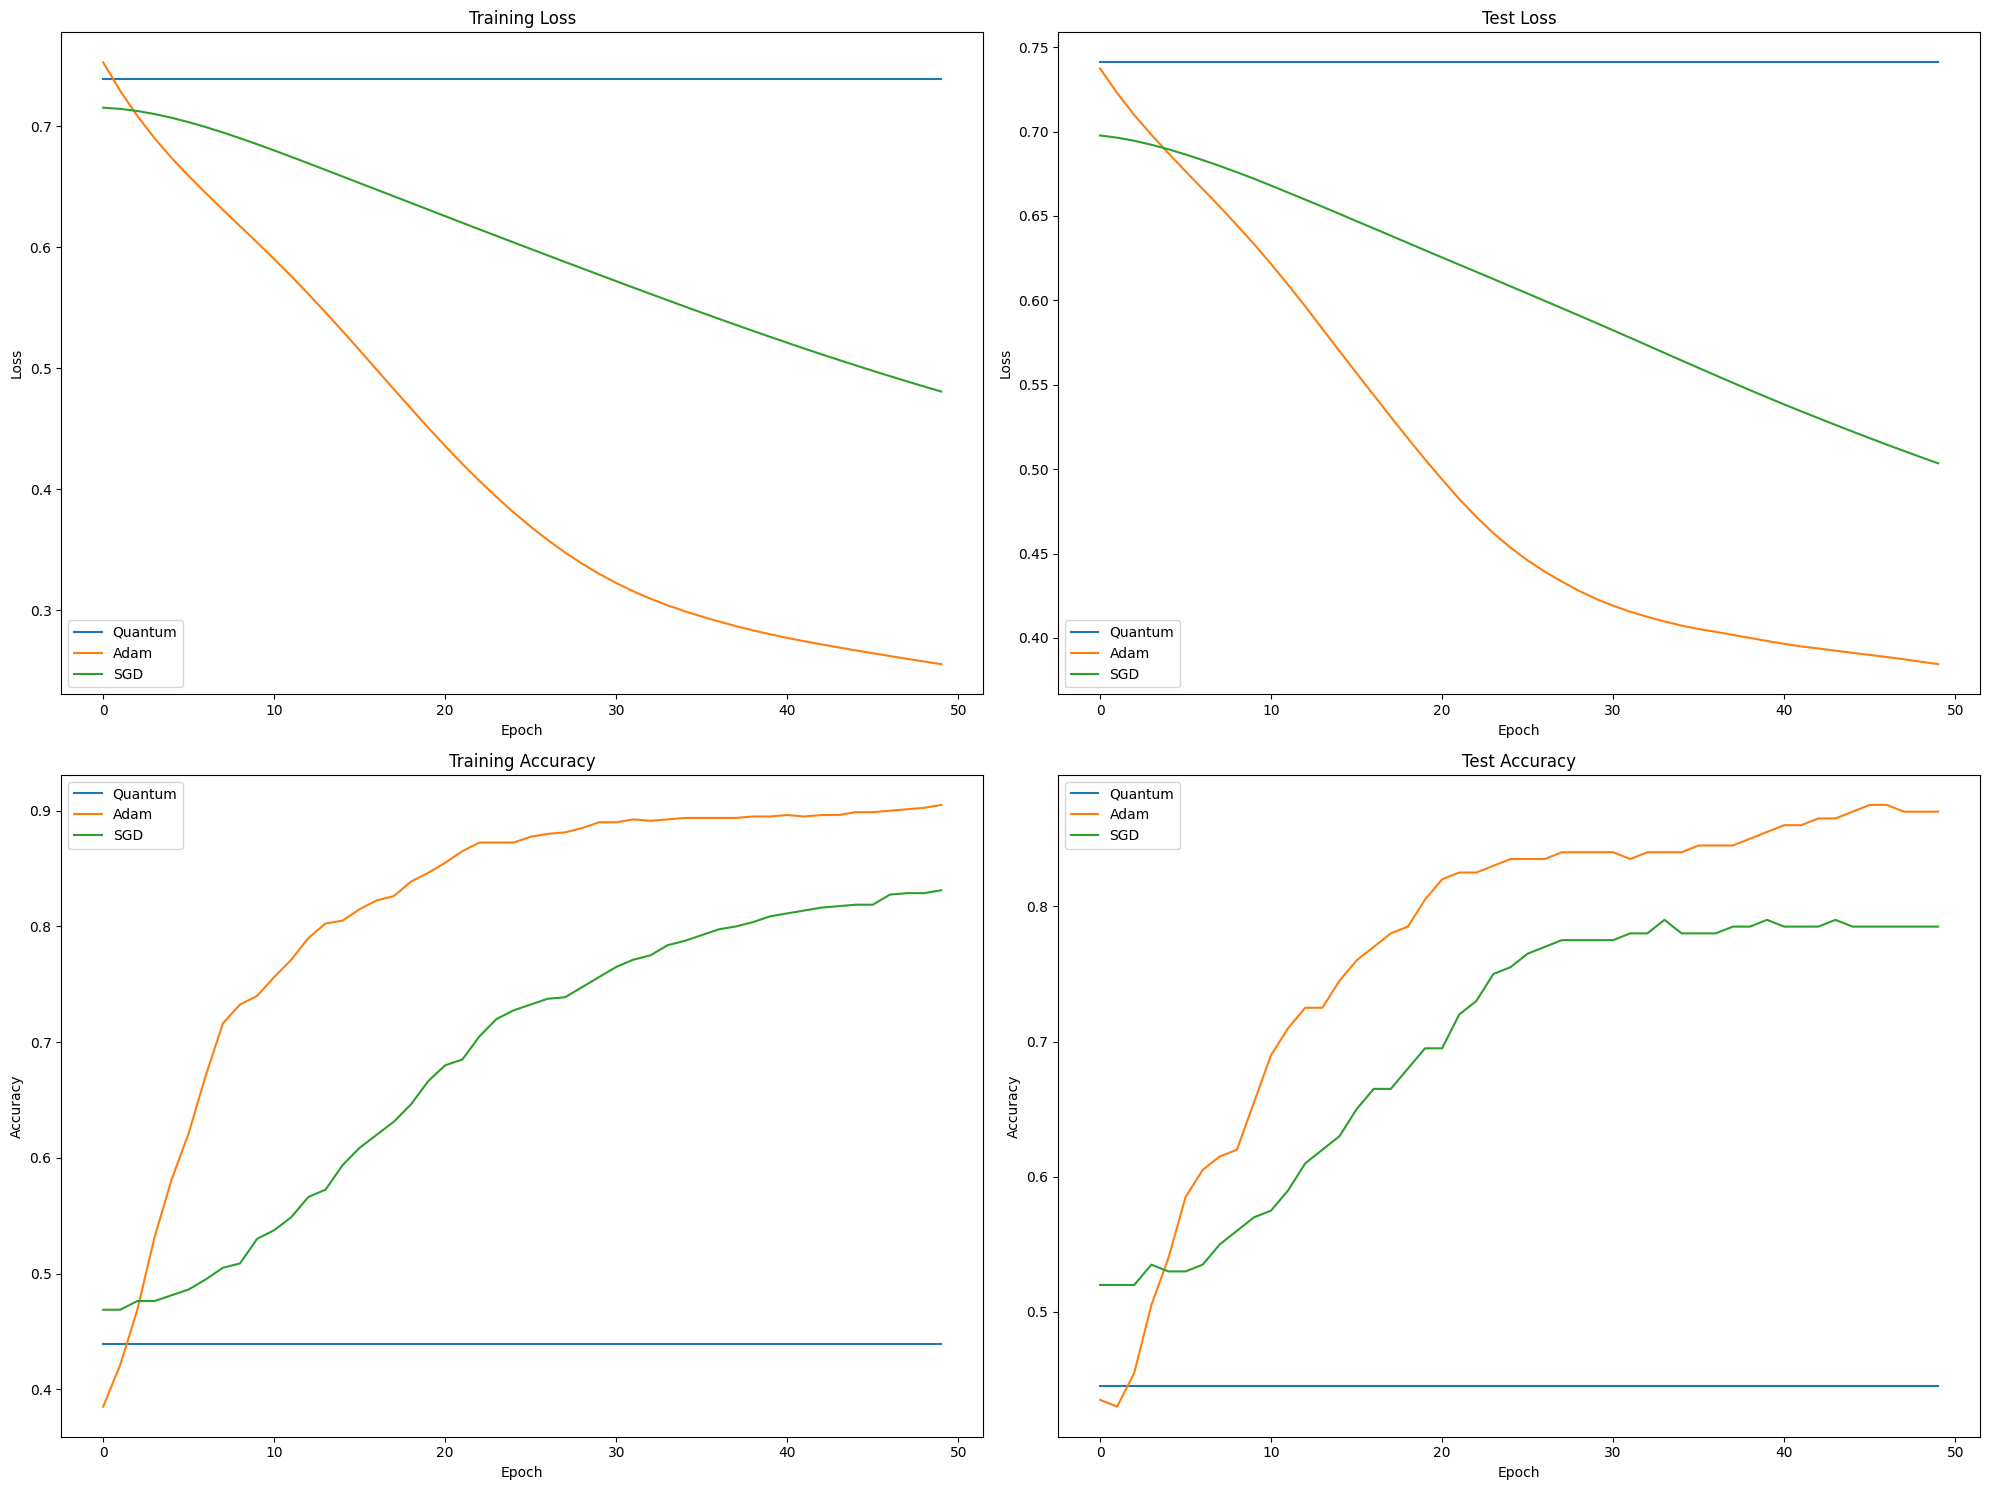


Training Times:
Quantum: 2.56 seconds
Adam: 0.07 seconds
SGD: 0.06 seconds

Final Results:
Quantum:
  Final Train Loss: 0.7387
  Final Test Loss: 0.7410
  Final Train Accuracy: 0.4387
  Final Test Accuracy: 0.4450
Adam:
  Final Train Loss: 0.2553
  Final Test Loss: 0.3845
  Final Train Accuracy: 0.9050
  Final Test Accuracy: 0.8700
SGD:
  Final Train Loss: 0.4806
  Final Test Loss: 0.5035
  Final Train Accuracy: 0.8313
  Final Test Accuracy: 0.7850


In [12]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

# Configurar el dispositivo de PennyLane para usar el simulador cuántico
dev = qml.device("default.qubit", wires=4)

# Definir el circuito cuántico
@qml.qnode(dev)
def quantum_circuit(params, features):
    # Codificación de características
    for i in range(4):
        qml.RY(features[i], wires=i)

    # Capas parametrizadas
    for layer in range(2):
        for i in range(4):
            qml.RX(params[layer][i][0], wires=i)
            qml.RY(params[layer][i][1], wires=i)
            qml.RZ(params[layer][i][2], wires=i)

        qml.CNOT(wires=[0, 1])
        qml.CNOT(wires=[1, 2])
        qml.CNOT(wires=[2, 3])

    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

# Clase de Optimizador Cuántico
class QuantumOptimizer(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01, momentum=0.9):
        defaults = dict(lr=lr, momentum=momentum)
        super(QuantumOptimizer, self).__init__(params, defaults)

        self.quantum_params = np.random.randn(2, 4, 3)  # Parámetros del circuito cuántico

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Redimensionar y asegurar que las dimensiones sean compatibles
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')

                # Aplicar optimización cuántica
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))

                # Redimensionar el gradiente cuántico para que coincida con los parámetros cuánticos
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Actualizar parámetros cuánticos (no los pesos de la red neuronal clásica)
                self.quantum_params -= group['lr'] * quantum_grad

                # Momentum para los parámetros cuánticos
                self.quantum_params += group['momentum'] * np.random.randn(*self.quantum_params.shape)

        return loss

# Modelo de red neuronal
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Función para entrenar y evaluar
def train_and_evaluate(model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs):
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Evaluación en conjunto de entrenamiento
        _, predicted = torch.max(outputs.data, 1)
        train_accuracy = (predicted == y_train).sum().item() / y_train.size(0)
        train_accuracies.append(train_accuracy)

        # Evaluación en conjunto de prueba
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            test_losses.append(test_loss.item())

            _, test_predicted = torch.max(test_outputs.data, 1)
            test_accuracy = (test_predicted == y_test).sum().item() / y_test.size(0)
            test_accuracies.append(test_accuracy)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, '
                  f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

    return train_losses, test_losses, train_accuracies, test_accuracies

# Generación de datos sintéticos
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conversión a tensores de PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# Parámetros del modelo
input_size = 20
hidden_size = 10
num_classes = 2
learning_rate = 0.01
epochs = 50  # Reducido debido a las limitaciones de tiempo en hardware real

# Inicialización de modelos y optimizadores
models = {
    'Quantum': (NeuralNetwork(input_size, hidden_size, num_classes),
                lambda params: QuantumOptimizer(params, lr=learning_rate)),
    'Adam': (NeuralNetwork(input_size, hidden_size, num_classes),
             lambda params: optim.Adam(params, lr=learning_rate)),
    'SGD': (NeuralNetwork(input_size, hidden_size, num_classes),
            lambda params: optim.SGD(params, lr=learning_rate, momentum=0.9))
}

criterion = nn.CrossEntropyLoss()

# Entrenamiento y evaluación
results = {}
for name, (model, opt_class) in models.items():
    print(f"\nTraining with {name} optimizer:")
    optimizer = opt_class(model.parameters())
    start_time = time.time()
    train_losses, test_losses, train_accuracies, test_accuracies = train_and_evaluate(
        model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs)
    end_time = time.time()

    results[name] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'train_accuracies': train_accuracies,
        'test_accuracies': test_accuracies,
        'time': end_time - start_time
    }

# Visualización de resultados
plt.figure(figsize=(20, 15))

# Gráfico de pérdida de entrenamiento
plt.subplot(2, 2, 1)
for name, data in results.items():
    plt.plot(data['train_losses'], label=name)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de pérdida de prueba
plt.subplot(2, 2, 2)
for name, data in results.items():
    plt.plot(data['test_losses'], label=name)
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de precisión de entrenamiento
plt.subplot(2, 2, 3)
for name, data in results.items():
    plt.plot(data['train_accuracies'], label=name)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de precisión de prueba
plt.subplot(2, 2, 4)
for name, data in results.items():
    plt.plot(data['test_accuracies'], label=name)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir tiempos de entrenamiento
print("\nTraining Times:")
for name, data in results.items():
    print(f"{name}: {data['time']:.2f} seconds")

# Análisis final
print("\nFinal Results:")
for name, data in results.items():
    print(f"{name}:")
    print(f"  Final Train Loss: {data['train_losses'][-1]:.4f}")
    print(f"  Final Test Loss: {data['test_losses'][-1]:.4f}")
    print(f"  Final Train Accuracy: {data['train_accuracies'][-1]:.4f}")
    print(f"  Final Test Accuracy: {data['test_accuracies'][-1]:.4f}")



Training with Quantum optimizer:
Epoch [10/50], Train Loss: 0.7105, Test Loss: 0.7127, Train Accuracy: 0.4713, Test Accuracy: 0.4550
Epoch [20/50], Train Loss: 0.7105, Test Loss: 0.7127, Train Accuracy: 0.4713, Test Accuracy: 0.4550
Epoch [30/50], Train Loss: 0.7105, Test Loss: 0.7127, Train Accuracy: 0.4713, Test Accuracy: 0.4550
Epoch [40/50], Train Loss: 0.7105, Test Loss: 0.7127, Train Accuracy: 0.4713, Test Accuracy: 0.4550
Epoch [50/50], Train Loss: 0.7105, Test Loss: 0.7127, Train Accuracy: 0.4713, Test Accuracy: 0.4550

Training with Adam optimizer:
Epoch [10/50], Train Loss: 0.5752, Test Loss: 0.5987, Train Accuracy: 0.7362, Test Accuracy: 0.7150
Epoch [20/50], Train Loss: 0.4137, Test Loss: 0.4547, Train Accuracy: 0.8475, Test Accuracy: 0.8150
Epoch [30/50], Train Loss: 0.3079, Test Loss: 0.3800, Train Accuracy: 0.8900, Test Accuracy: 0.8500
Epoch [40/50], Train Loss: 0.2710, Test Loss: 0.3797, Train Accuracy: 0.8962, Test Accuracy: 0.8700
Epoch [50/50], Train Loss: 0.2499, 

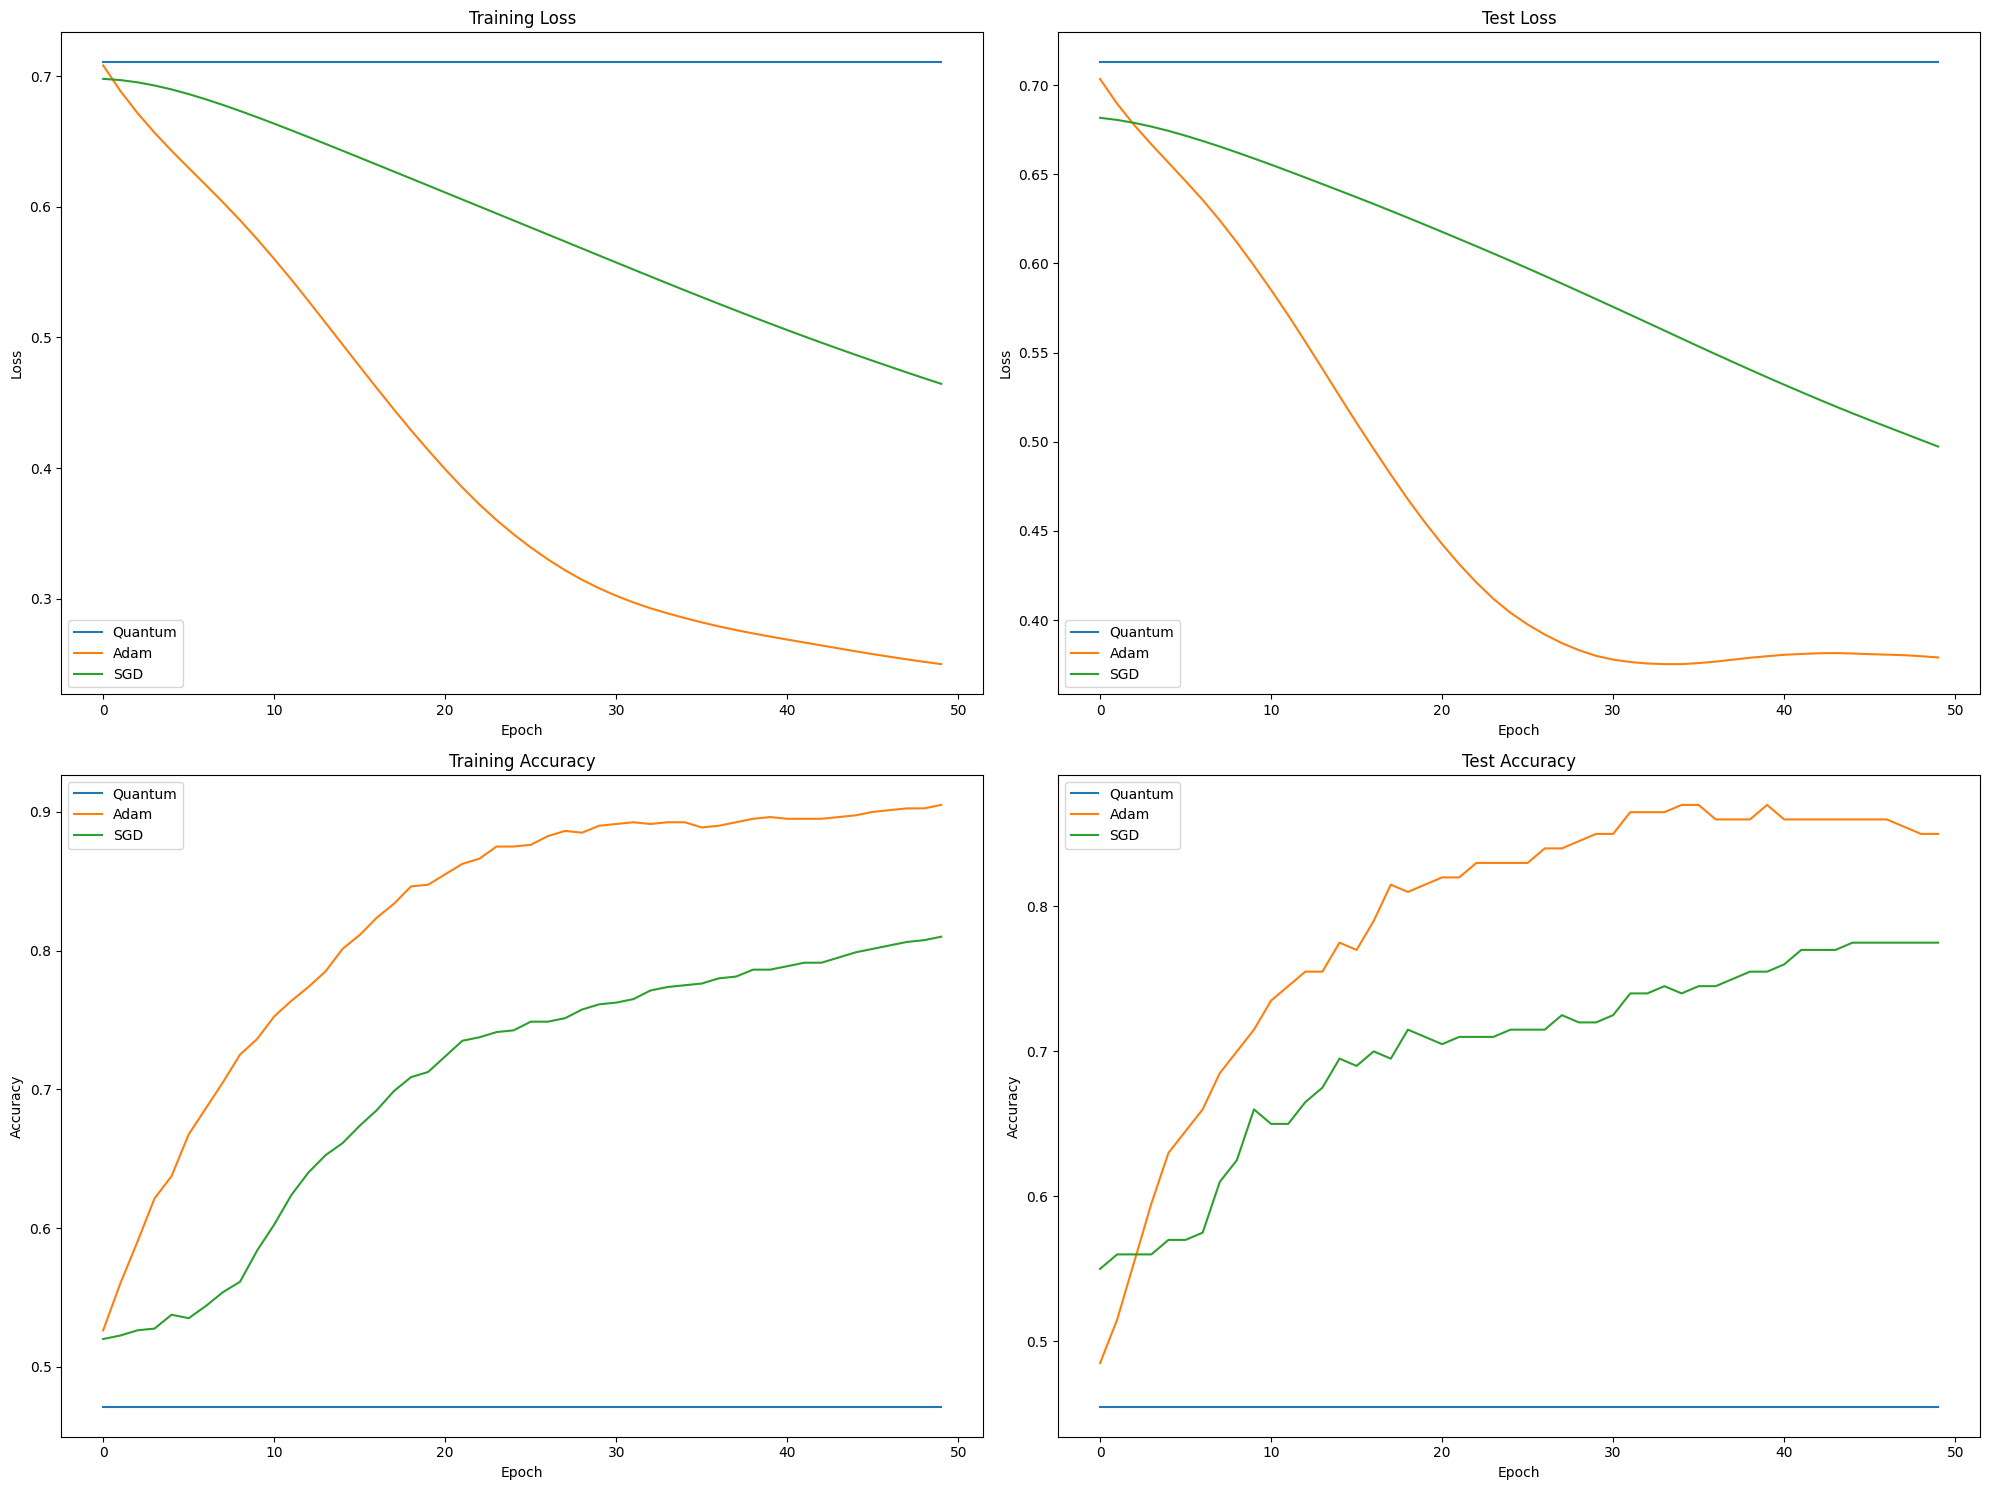


Training Times:
Quantum: 2.24 seconds
Adam: 0.06 seconds
SGD: 0.05 seconds

Final Results:
Quantum:
  Final Train Loss: 0.7105
  Final Test Loss: 0.7127
  Final Train Accuracy: 0.4713
  Final Test Accuracy: 0.4550
Adam:
  Final Train Loss: 0.2499
  Final Test Loss: 0.3791
  Final Train Accuracy: 0.9050
  Final Test Accuracy: 0.8500
SGD:
  Final Train Loss: 0.4644
  Final Test Loss: 0.4973
  Final Train Accuracy: 0.8100
  Final Test Accuracy: 0.7750


In [14]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

# Configurar el dispositivo de PennyLane para usar el simulador cuántico
dev = qml.device("default.qubit", wires=4)

# Definir el circuito cuántico
@qml.qnode(dev)
def quantum_circuit(params, features):
    # Codificación de características
    for i in range(4):
        qml.RY(features[i], wires=i)

    # Capas parametrizadas
    for layer in range(2):
        for i in range(4):
            qml.RX(params[layer][i][0], wires=i)
            qml.RY(params[layer][i][1], wires=i)
            qml.RZ(params[layer][i][2], wires=i)

        qml.CNOT(wires=[0, 1])
        qml.CNOT(wires=[1, 2])
        qml.CNOT(wires=[2, 3])

    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

# Clase de Optimizador Cuántico
class QuantumOptimizer(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01, momentum=0.9):
        defaults = dict(lr=lr, momentum=momentum)
        super(QuantumOptimizer, self).__init__(params, defaults)

        self.quantum_params = np.random.randn(2, 4, 3)  # Parámetros del circuito cuántico

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Redimensionar y asegurar que las dimensiones sean compatibles
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')

                # Aplicar optimización cuántica
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))

                # Redimensionar el gradiente cuántico para que coincida con los parámetros cuánticos
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Actualizar parámetros cuánticos (no los pesos de la red neuronal clásica)
                self.quantum_params -= group['lr'] * quantum_grad

                # Momentum para los parámetros cuánticos
                self.quantum_params += group['momentum'] * np.random.randn(*self.quantum_params.shape)

        return loss

# Modelo de red neuronal
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Función para entrenar y evaluar
def train_and_evaluate(model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs):
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Evaluación en conjunto de entrenamiento
        _, predicted = torch.max(outputs.data, 1)
        train_accuracy = (predicted == y_train).sum().item() / y_train.size(0)
        train_accuracies.append(train_accuracy)

        # Evaluación en conjunto de prueba
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            test_losses.append(test_loss.item())

            _, test_predicted = torch.max(test_outputs.data, 1)
            test_accuracy = (test_predicted == y_test).sum().item() / y_test.size(0)
            test_accuracies.append(test_accuracy)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, '
                  f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

    return train_losses, test_losses, train_accuracies, test_accuracies

# Generación de datos sintéticos
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conversión a tensores de PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# Parámetros del modelo
input_size = 20
hidden_size = 10
num_classes = 2
learning_rate = 0.01
epochs = 50  # Reducido debido a las limitaciones de tiempo en hardware real

# Inicialización de modelos y optimizadores
models = {
    'Quantum': (NeuralNetwork(input_size, hidden_size, num_classes),
                lambda params: QuantumOptimizer(params, lr=learning_rate)),
    'Adam': (NeuralNetwork(input_size, hidden_size, num_classes),
             lambda params: optim.Adam(params, lr=learning_rate)),
    'SGD': (NeuralNetwork(input_size, hidden_size, num_classes),
            lambda params: optim.SGD(params, lr=learning_rate, momentum=0.9))
}

criterion = nn.CrossEntropyLoss()

# Entrenamiento y evaluación
results = {}
for name, (model, opt_class) in models.items():
    print(f"\nTraining with {name} optimizer:")
    optimizer = opt_class(model.parameters())
    start_time = time.time()
    train_losses, test_losses, train_accuracies, test_accuracies = train_and_evaluate(
        model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs)
    end_time = time.time()

    results[name] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'train_accuracies': train_accuracies,
        'test_accuracies': test_accuracies,
        'time': end_time - start_time
    }

# Visualización de resultados
plt.figure(figsize=(20, 15))

# Gráfico de pérdida de entrenamiento
plt.subplot(2, 2, 1)
for name, data in results.items():
    plt.plot(data['train_losses'], label=name)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de pérdida de prueba
plt.subplot(2, 2, 2)
for name, data in results.items():
    plt.plot(data['test_losses'], label=name)
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de precisión de entrenamiento
plt.subplot(2, 2, 3)
for name, data in results.items():
    plt.plot(data['train_accuracies'], label=name)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de precisión de prueba
plt.subplot(2, 2, 4)
for name, data in results.items():
    plt.plot(data['test_accuracies'], label=name)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir tiempos de entrenamiento
print("\nTraining Times:")
for name, data in results.items():
    print(f"{name}: {data['time']:.2f} seconds")

# Análisis final
print("\nFinal Results:")
for name, data in results.items():
    print(f"{name}:")
    print(f"  Final Train Loss: {data['train_losses'][-1]:.4f}")
    print(f"  Final Test Loss: {data['test_losses'][-1]:.4f}")
    print(f"  Final Train Accuracy: {data['train_accuracies'][-1]:.4f}")
    print(f"  Final Test Accuracy: {data['test_accuracies'][-1]:.4f}")


In [13]:
pip install pennylane torch scikit-learn matplotlib

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

# RESULTADOS

## Resultados 1


Training with QGD optimizer:
Epoch [10/50], Train Loss: 0.7165, Test Loss: 0.7360, Train Accuracy: 0.5200, Test Accuracy: 0.4450
Epoch [20/50], Train Loss: 0.7165, Test Loss: 0.7360, Train Accuracy: 0.5200, Test Accuracy: 0.4450
Epoch [30/50], Train Loss: 0.7165, Test Loss: 0.7360, Train Accuracy: 0.5200, Test Accuracy: 0.4450
Epoch [40/50], Train Loss: 0.7165, Test Loss: 0.7360, Train Accuracy: 0.5200, Test Accuracy: 0.4450
Epoch [50/50], Train Loss: 0.7165, Test Loss: 0.7360, Train Accuracy: 0.5200, Test Accuracy: 0.4450

Training with QNGD optimizer:
Epoch [10/50], Train Loss: 0.6456, Test Loss: 0.6572, Train Accuracy: 0.6350, Test Accuracy: 0.6000
Epoch [20/50], Train Loss: 0.6456, Test Loss: 0.6572, Train Accuracy: 0.6350, Test Accuracy: 0.6000
Epoch [30/50], Train Loss: 0.6456, Test Loss: 0.6572, Train Accuracy: 0.6350, Test Accuracy: 0.6000
Epoch [40/50], Train Loss: 0.6456, Test Loss: 0.6572, Train Accuracy: 0.6350, Test Accuracy: 0.6000
Epoch [50/50], Train Loss: 0.6456, Test

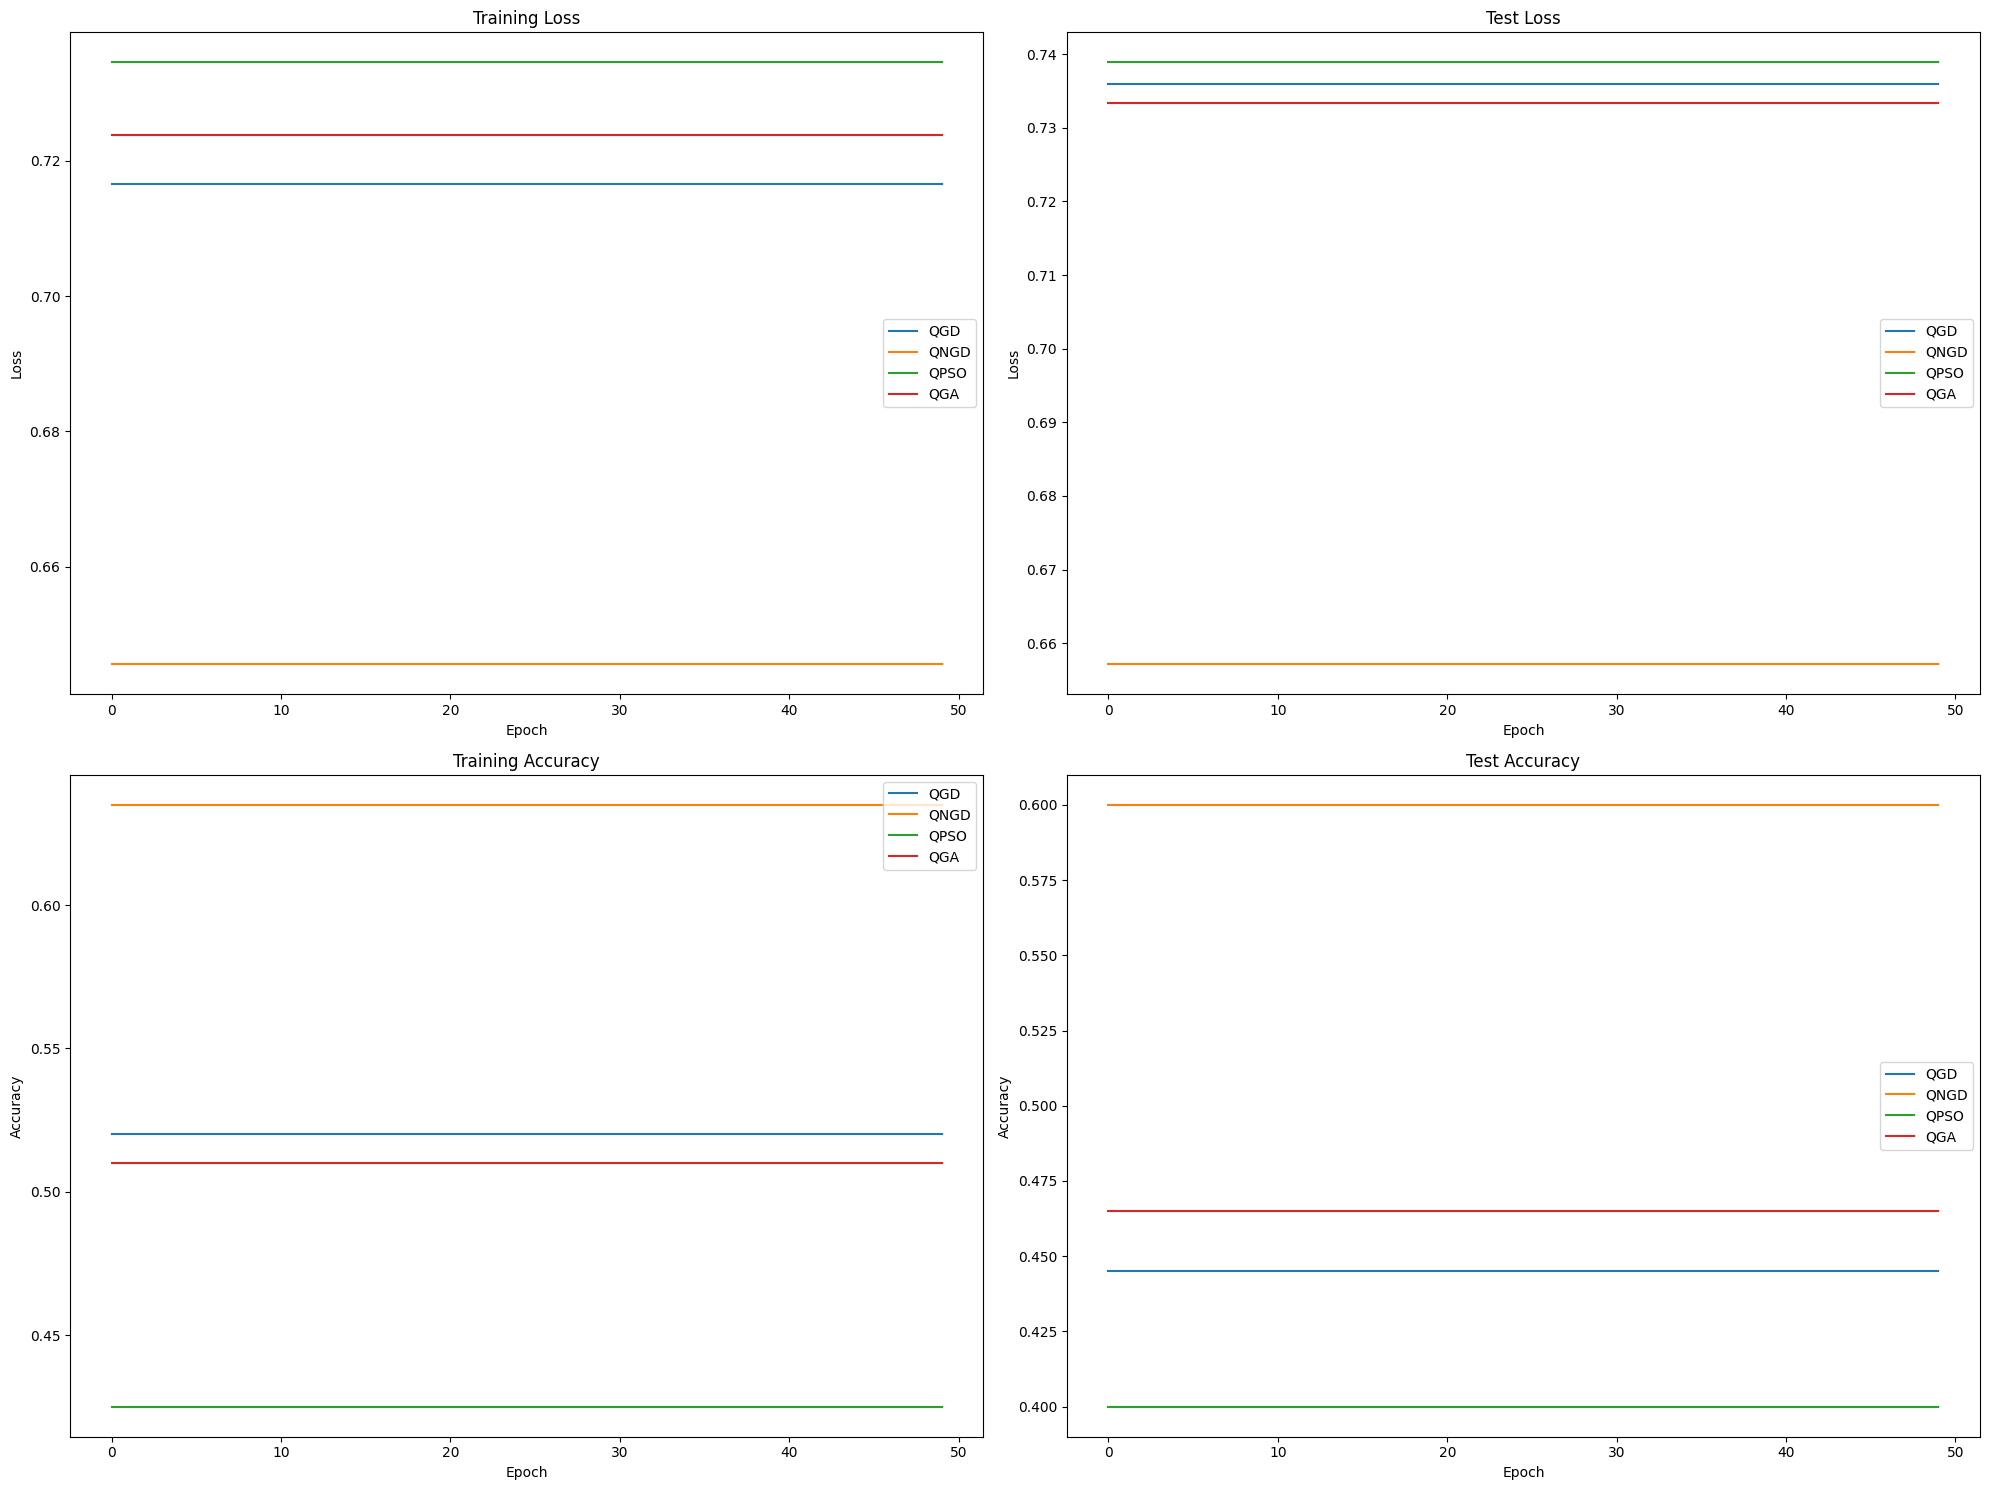


Training Times:
QGD: 2.88 seconds
QNGD: 3.04 seconds
QPSO: 2.21 seconds
QGA: 5.07 seconds

Final Results:
QGD:
  Final Train Loss: 0.7165
  Final Test Loss: 0.7360
  Final Train Accuracy: 0.5200
  Final Test Accuracy: 0.4450
QNGD:
  Final Train Loss: 0.6456
  Final Test Loss: 0.6572
  Final Train Accuracy: 0.6350
  Final Test Accuracy: 0.6000
QPSO:
  Final Train Loss: 0.7345
  Final Test Loss: 0.7389
  Final Train Accuracy: 0.4250
  Final Test Accuracy: 0.4000
QGA:
  Final Train Loss: 0.7238
  Final Test Loss: 0.7334
  Final Train Accuracy: 0.5100
  Final Test Accuracy: 0.4650


In [25]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

# Configurar el dispositivo de PennyLane para usar el simulador cuántico
dev = qml.device("default.qubit", wires=4)

# Definir el circuito cuántico
@qml.qnode(dev)
def quantum_circuit(params, features):
    # Codificación de características
    for i in range(4):
        qml.RY(features[i], wires=i)

    # Capas parametrizadas
    for layer in range(2):
        for i in range(4):
            qml.RX(params[layer][i][0], wires=i)
            qml.RY(params[layer][i][1], wires=i)
            qml.RZ(params[layer][i][2], wires=i)

        qml.CNOT(wires=[0, 1])
        qml.CNOT(wires=[1, 2])
        qml.CNOT(wires=[2, 3])

    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

# Modelo de red neuronal
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Función para entrenar y evaluar
def train_and_evaluate(model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs):
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Evaluación en conjunto de entrenamiento
        _, predicted = torch.max(outputs.data, 1)
        train_accuracy = (predicted == y_train).sum().item() / y_train.size(0)
        train_accuracies.append(train_accuracy)

        # Evaluación en conjunto de prueba
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            test_losses.append(test_loss.item())

            _, test_predicted = torch.max(test_outputs.data, 1)
            test_accuracy = (test_predicted == y_test).sum().item() / y_test.size(0)
            test_accuracies.append(test_accuracy)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, '
                  f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

    return train_losses, test_losses, train_accuracies, test_accuracies

# Optimizadores Cuánticos
class QuantumGradientDescent(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01):
        defaults = dict(lr=lr)
        super(QuantumGradientDescent, self).__init__(params, defaults)
        self.quantum_params = np.random.randn(2, 4, 3)  # Inicialización de los parámetros cuánticos

    def step(self, closure=None):
        loss = closure() if closure is not None else None

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Calcular el gradiente cuántico
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Actualizar parámetros cuánticos
                self.quantum_params -= group['lr'] * quantum_grad

        return loss

class QuantumNaturalGradientDescent(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01):
        defaults = dict(lr=lr)
        super(QuantumNaturalGradientDescent, self).__init__(params, defaults)
        self.quantum_params = np.random.randn(2, 4, 3)  # Inicialización de los parámetros cuánticos

    def step(self, closure=None):
        loss = closure() if closure is not None else None

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Calcular el gradiente cuántico
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Actualizar parámetros cuánticos utilizando el gradiente natural
                fisher_information_matrix = np.eye(self.quantum_params.size)  # Matriz de información de Fisher (simplificada)
                inv_fisher_information = np.linalg.inv(fisher_information_matrix)
                natural_grad = np.dot(inv_fisher_information, quantum_grad.flatten()).reshape(self.quantum_params.shape)

                self.quantum_params -= group['lr'] * natural_grad

        return loss

class QuantumParticleSwarmOptimization(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01):
        defaults = dict(lr=lr)
        super(QuantumParticleSwarmOptimization, self).__init__(params, defaults)
        self.quantum_params = np.random.randn(2, 4, 3)  # Inicialización de los parámetros cuánticos
        self.best_position = np.copy(self.quantum_params)
        self.best_score = float('inf')
        self.velocity = np.zeros_like(self.quantum_params)

    def step(self, closure=None):
        loss = closure() if closure is not None else None

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Calcular el gradiente cuántico
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Actualizar velocidad y posición (parámetros cuánticos)
                self.velocity = 0.5 * self.velocity + 0.5 * quantum_grad
                self.quantum_params -= group['lr'] * self.velocity

                # Evaluar la nueva posición
                if loss is not None:
                    score = loss.item()
                    if score < self.best_score:
                        self.best_score = score
                        self.best_position = np.copy(self.quantum_params)

        return loss

class QuantumGeneticAlgorithm(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01, mutation_rate=0.01, crossover_rate=0.7):
        defaults = dict(lr=lr)
        super(QuantumGeneticAlgorithm, self).__init__(params, defaults)
        self.quantum_params = np.random.randn(2, 4, 3)  # Inicialización de los parámetros cuánticos
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def step(self, closure=None):
        loss = closure() if closure is not None else None

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Calcular el gradiente cuántico
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Aplicar operadores genéticos
                if np.random.rand() < self.crossover_rate:
                    crossover_point = np.random.randint(1, self.quantum_params.size - 1)
                    flat_params = self.quantum_params.flatten()
                    flat_grad = quantum_grad.flatten()
                    flat_params[:crossover_point], flat_grad[:crossover_point] = flat_grad[:crossover_point], flat_params[:crossover_point]
                    self.quantum_params = flat_params.reshape(self.quantum_params.shape)

                mutation_mask = np.random.rand(*self.quantum_params.shape) < self.mutation_rate
                self.quantum_params += mutation_mask * np.random.randn(*self.quantum_params.shape) * group['lr']

        return loss

# Generación de datos sintéticos
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conversión a tensores de PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# Parámetros del modelo
input_size = 20
hidden_size = 10
num_classes = 2
learning_rate = 0.01
epochs = 50

# Inicialización de modelos y optimizadores
models = {
    'QGD': (NeuralNetwork(input_size, hidden_size, num_classes),
            lambda params: QuantumGradientDescent(params, lr=learning_rate)),
    'QNGD': (NeuralNetwork(input_size, hidden_size, num_classes),
             lambda params: QuantumNaturalGradientDescent(params, lr=learning_rate)),
    'QPSO': (NeuralNetwork(input_size, hidden_size, num_classes),
             lambda params: QuantumParticleSwarmOptimization(params, lr=learning_rate)),
    'QGA': (NeuralNetwork(input_size, hidden_size, num_classes),
            lambda params: QuantumGeneticAlgorithm(params, lr=learning_rate))
}

criterion = nn.CrossEntropyLoss()

# Entrenamiento y evaluación
results = {}
for name, (model, opt_class) in models.items():
    print(f"\nTraining with {name} optimizer:")
    optimizer = opt_class(model.parameters())
    start_time = time.time()
    train_losses, test_losses, train_accuracies, test_accuracies = train_and_evaluate(
        model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs)
    end_time = time.time()

    results[name] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'train_accuracies': train_accuracies,
        'test_accuracies': test_accuracies,
        'time': end_time - start_time
    }

# Visualización de resultados
plt.figure(figsize=(20, 15))

# Gráfico de pérdida de entrenamiento
plt.subplot(2, 2, 1)
for name, data in results.items():
    plt.plot(data['train_losses'], label=name)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de pérdida de prueba
plt.subplot(2, 2, 2)
for name, data in results.items():
    plt.plot(data['test_losses'], label=name)
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de precisión de entrenamiento
plt.subplot(2, 2, 3)
for name, data in results.items():
    plt.plot(data['train_accuracies'], label=name)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de precisión de prueba
plt.subplot(2, 2, 4)
for name, data in results.items():
    plt.plot(data['test_accuracies'], label=name)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir tiempos de entrenamiento
print("\nTraining Times:")
for name, data in results.items():
    print(f"{name}: {data['time']:.2f} seconds")

# Análisis final
print("\nFinal Results:")
for name, data in results.items():
    print(f"{name}:")
    print(f"  Final Train Loss: {data['train_losses'][-1]:.4f}")
    print(f"  Final Test Loss: {data['test_losses'][-1]:.4f}")
    print(f"  Final Train Accuracy: {data['train_accuracies'][-1]:.4f}")
    print(f"  Final Test Accuracy: {data['test_accuracies'][-1]:.4f}")


## Resultados 2


Training with QGD optimizer:
Epoch [10/50], Train Loss: 0.9159, Test Loss: 0.8279, Train Accuracy: 0.3950, Test Accuracy: 0.3350
Epoch [20/50], Train Loss: 0.9265, Test Loss: 0.8581, Train Accuracy: 0.4213, Test Accuracy: 0.3300
Epoch [30/50], Train Loss: 0.9542, Test Loss: 0.8733, Train Accuracy: 0.3875, Test Accuracy: 0.3350
Epoch [40/50], Train Loss: 0.9158, Test Loss: 0.8796, Train Accuracy: 0.4175, Test Accuracy: 0.3450
Epoch [50/50], Train Loss: 0.9335, Test Loss: 0.8820, Train Accuracy: 0.4263, Test Accuracy: 0.3450

Training with QNGD optimizer:
Epoch [10/50], Train Loss: 0.7842, Test Loss: 0.7205, Train Accuracy: 0.5250, Test Accuracy: 0.4450
Epoch [20/50], Train Loss: 0.7611, Test Loss: 0.7300, Train Accuracy: 0.5100, Test Accuracy: 0.4600
Epoch [30/50], Train Loss: 0.7607, Test Loss: 0.7348, Train Accuracy: 0.5275, Test Accuracy: 0.4550
Epoch [40/50], Train Loss: 0.7681, Test Loss: 0.7368, Train Accuracy: 0.5075, Test Accuracy: 0.4550
Epoch [50/50], Train Loss: 0.7574, Test

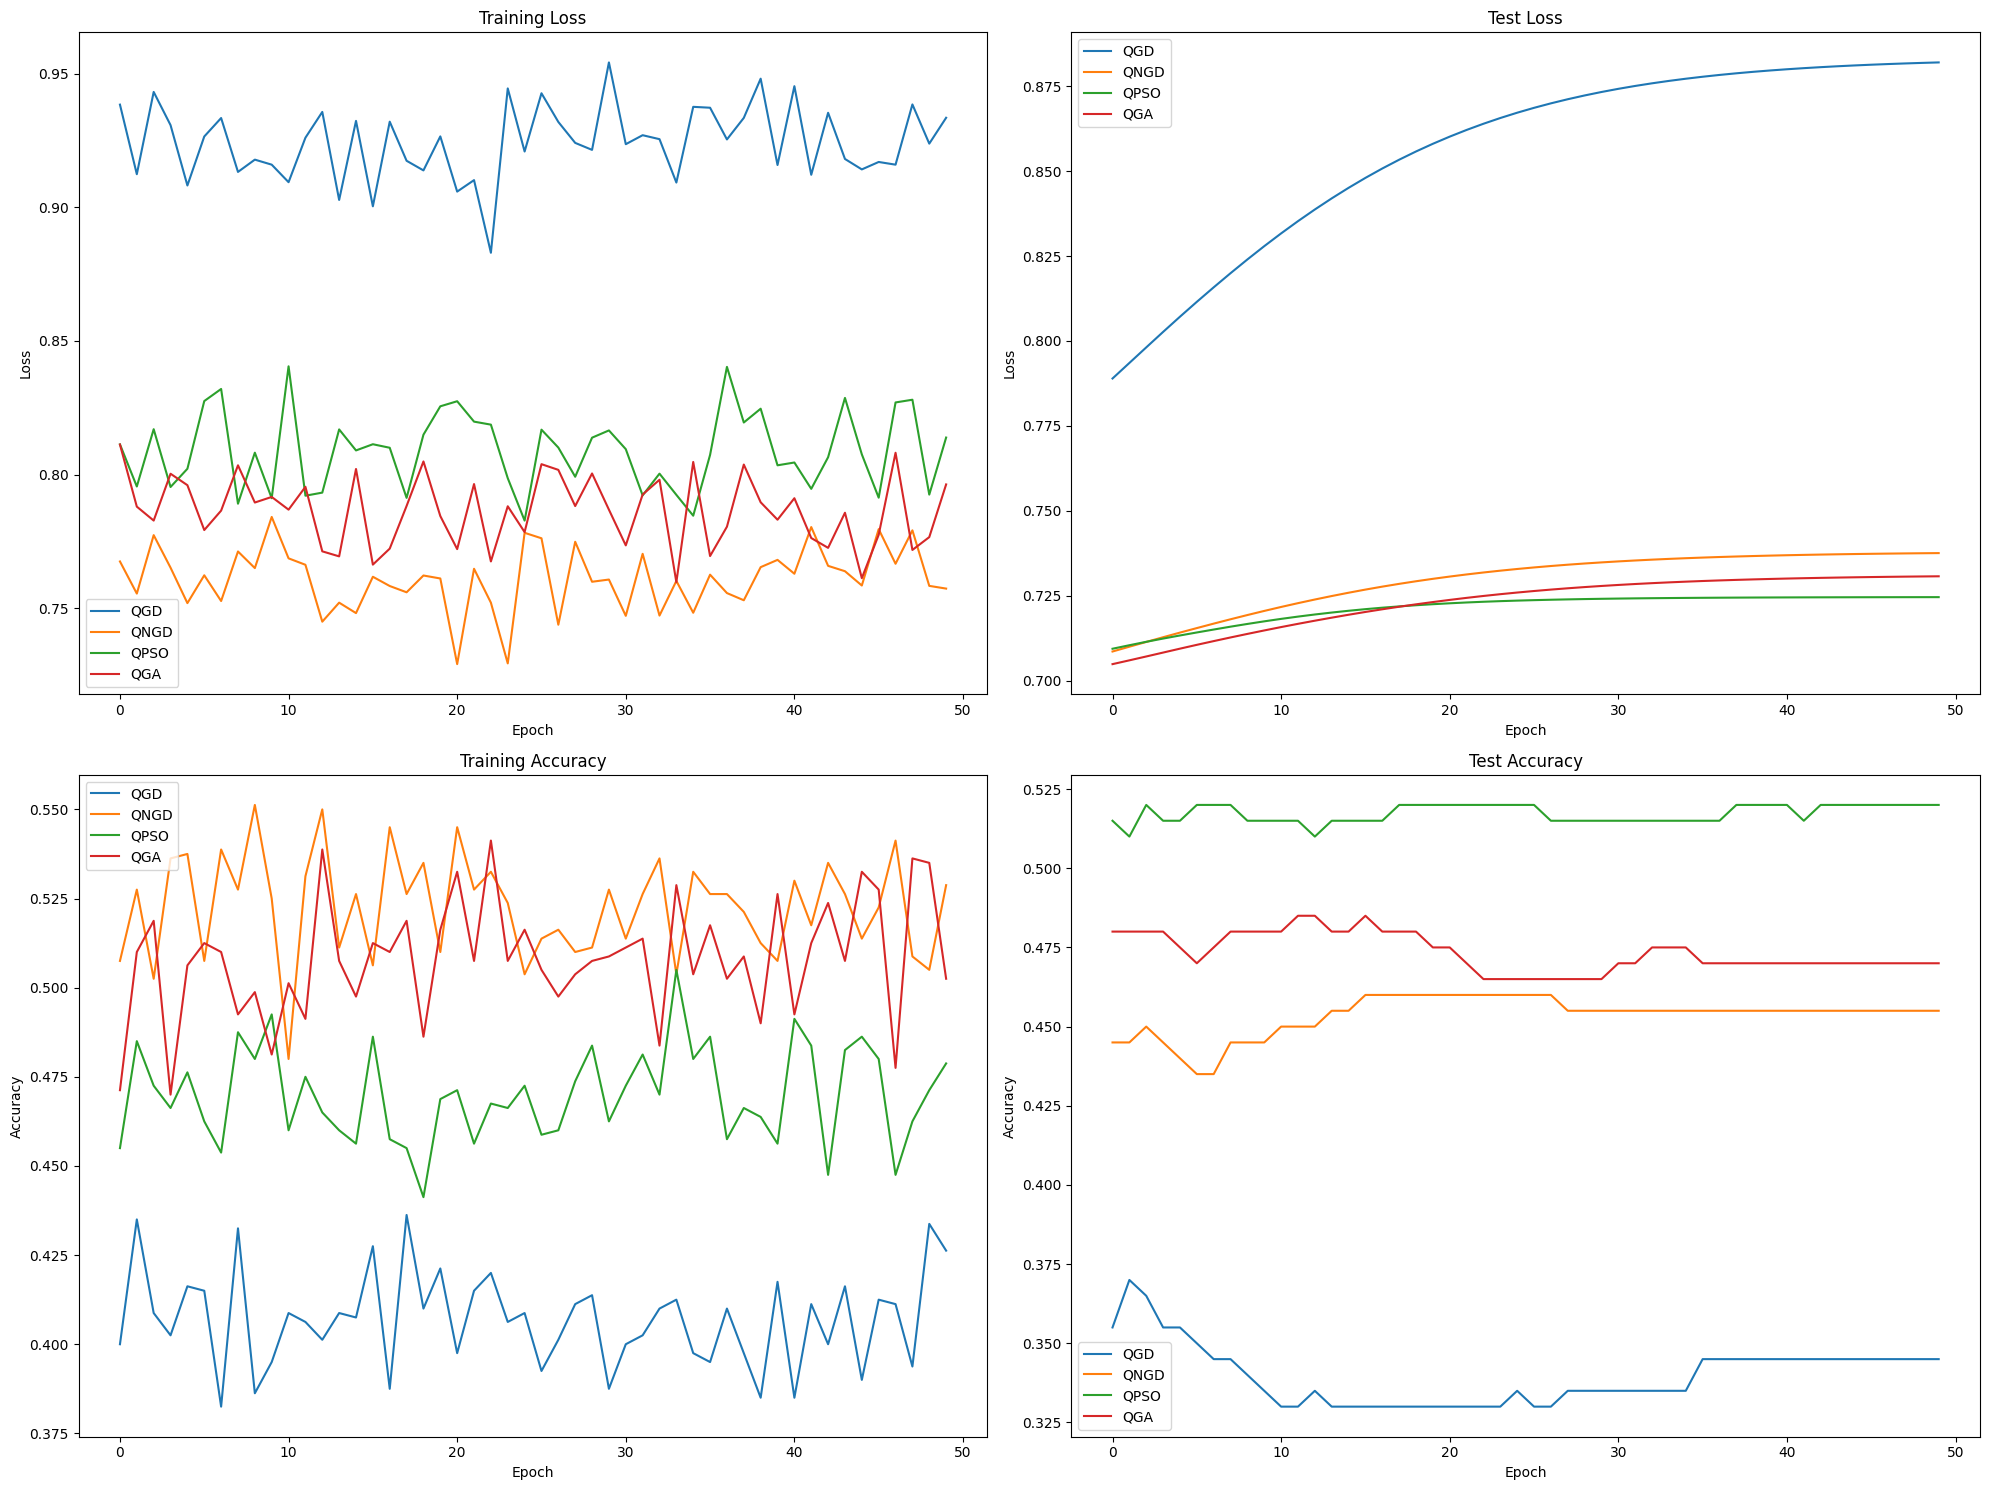


Training Times:
QGD: 3.33 seconds
QNGD: 4.37 seconds
QPSO: 3.91 seconds
QGA: 3.31 seconds

Final Results:
QGD:
  Final Train Loss: 0.9335
  Final Test Loss: 0.8820
  Final Train Accuracy: 0.4263
  Final Test Accuracy: 0.3450
QNGD:
  Final Train Loss: 0.7574
  Final Test Loss: 0.7376
  Final Train Accuracy: 0.5288
  Final Test Accuracy: 0.4550
QPSO:
  Final Train Loss: 0.8138
  Final Test Loss: 0.7246
  Final Train Accuracy: 0.4788
  Final Test Accuracy: 0.5200
QGA:
  Final Train Loss: 0.7963
  Final Test Loss: 0.7307
  Final Train Accuracy: 0.5025
  Final Test Accuracy: 0.4700


In [26]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

# Configurar el dispositivo de PennyLane para usar el simulador cuántico
dev = qml.device("default.qubit", wires=4)

# Definir el circuito cuántico
@qml.qnode(dev)
def quantum_circuit(params, features):
    # Codificación de características
    for i in range(4):
        qml.RY(features[i], wires=i)

    # Capas parametrizadas
    for layer in range(2):
        for i in range(4):
            qml.RX(params[layer][i][0], wires=i)
            qml.RY(params[layer][i][1], wires=i)
            qml.RZ(params[layer][i][2], wires=i)

        qml.CNOT(wires=[0, 1])
        qml.CNOT(wires=[1, 2])
        qml.CNOT(wires=[2, 3])

    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

# Modelo de red neuronal con Batch Normalization y Dropout
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

# Función para entrenar y evaluar
def train_and_evaluate(model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs):
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Evaluación en conjunto de entrenamiento
        _, predicted = torch.max(outputs.data, 1)
        train_accuracy = (predicted == y_train).sum().item() / y_train.size(0)
        train_accuracies.append(train_accuracy)

        # Evaluación en conjunto de prueba
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            test_losses.append(test_loss.item())

            _, test_predicted = torch.max(test_outputs.data, 1)
            test_accuracy = (test_predicted == y_test).sum().item() / y_test.size(0)
            test_accuracies.append(test_accuracy)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, '
                  f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

    return train_losses, test_losses, train_accuracies, test_accuracies

# Optimizadores Cuánticos
class QuantumGradientDescent(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01):
        defaults = dict(lr=lr)
        super(QuantumGradientDescent, self).__init__(params, defaults)
        self.quantum_params = np.random.randn(2, 4, 3)  # Inicialización de los parámetros cuánticos

    def step(self, closure=None):
        loss = closure() if closure is not None else None

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Calcular el gradiente cuántico
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Actualizar parámetros cuánticos
                self.quantum_params -= group['lr'] * quantum_grad

        return loss

class QuantumNaturalGradientDescent(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01):
        defaults = dict(lr=lr)
        super(QuantumNaturalGradientDescent, self).__init__(params, defaults)
        self.quantum_params = np.random.randn(2, 4, 3)  # Inicialización de los parámetros cuánticos

    def step(self, closure=None):
        loss = closure() if closure is not None else None

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Calcular el gradiente cuántico
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Actualizar parámetros cuánticos utilizando el gradiente natural
                fisher_information_matrix = np.eye(self.quantum_params.size)  # Matriz de información de Fisher (simplificada)
                inv_fisher_information = np.linalg.inv(fisher_information_matrix)
                natural_grad = np.dot(inv_fisher_information, quantum_grad.flatten()).reshape(self.quantum_params.shape)

                self.quantum_params -= group['lr'] * natural_grad

        return loss

class QuantumParticleSwarmOptimization(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01):
        defaults = dict(lr=lr)
        super(QuantumParticleSwarmOptimization, self).__init__(params, defaults)
        self.quantum_params = np.random.randn(2, 4, 3)  # Inicialización de los parámetros cuánticos
        self.best_position = np.copy(self.quantum_params)
        self.best_score = float('inf')
        self.velocity = np.zeros_like(self.quantum_params)

    def step(self, closure=None):
        loss = closure() if closure is not None else None

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Calcular el gradiente cuántico
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Actualizar velocidad y posición (parámetros cuánticos)
                self.velocity = 0.5 * self.velocity + 0.5 * quantum_grad
                self.quantum_params -= group['lr'] * self.velocity

                # Evaluar la nueva posición
                if loss is not None:
                    score = loss.item()
                    if score < self.best_score:
                        self.best_score = score
                        self.best_position = np.copy(self.quantum_params)

        return loss

class QuantumGeneticAlgorithm(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01, mutation_rate=0.01, crossover_rate=0.7):
        defaults = dict(lr=lr)
        super(QuantumGeneticAlgorithm, self).__init__(params, defaults)
        self.quantum_params = np.random.randn(2, 4, 3)  # Inicialización de los parámetros cuánticos
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def step(self, closure=None):
        loss = closure() if closure is not None else None

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Calcular el gradiente cuántico
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Aplicar operadores genéticos
                if np.random.rand() < self.crossover_rate:
                    crossover_point = np.random.randint(1, self.quantum_params.size - 1)
                    flat_params = self.quantum_params.flatten()
                    flat_grad = quantum_grad.flatten()
                    flat_params[:crossover_point], flat_grad[:crossover_point] = flat_grad[:crossover_point], flat_params[:crossover_point]
                    self.quantum_params = flat_params.reshape(self.quantum_params.shape)

                mutation_mask = np.random.rand(*self.quantum_params.shape) < self.mutation_rate
                self.quantum_params += mutation_mask * np.random.randn(*self.quantum_params.shape) * group['lr']

        return loss

# Generación de datos sintéticos
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conversión a tensores de PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# Parámetros del modelo
input_size = 20
hidden_size = 10
num_classes = 2
learning_rate = 0.01
epochs = 50

# Inicialización de modelos y optimizadores
models = {
    'QGD': (NeuralNetwork(input_size, hidden_size, num_classes),
            lambda params: QuantumGradientDescent(params, lr=learning_rate)),
    'QNGD': (NeuralNetwork(input_size, hidden_size, num_classes),
             lambda params: QuantumNaturalGradientDescent(params, lr=learning_rate)),
    'QPSO': (NeuralNetwork(input_size, hidden_size, num_classes),
             lambda params: QuantumParticleSwarmOptimization(params, lr=learning_rate)),
    'QGA': (NeuralNetwork(input_size, hidden_size, num_classes),
            lambda params: QuantumGeneticAlgorithm(params, lr=learning_rate))
}

criterion = nn.CrossEntropyLoss()

# Entrenamiento y evaluación
results = {}
for name, (model, opt_class) in models.items():
    print(f"\nTraining with {name} optimizer:")
    optimizer = opt_class(model.parameters())
    start_time = time.time()
    train_losses, test_losses, train_accuracies, test_accuracies = train_and_evaluate(
        model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs)
    end_time = time.time()

    results[name] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'train_accuracies': train_accuracies,
        'test_accuracies': test_accuracies,
        'time': end_time - start_time
    }

# Visualización de resultados
plt.figure(figsize=(20, 15))

# Gráfico de pérdida de entrenamiento
plt.subplot(2, 2, 1)
for name, data in results.items():
    plt.plot(data['train_losses'], label=name)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de pérdida de prueba
plt.subplot(2, 2, 2)
for name, data in results.items():
    plt.plot(data['test_losses'], label=name)
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de precisión de entrenamiento
plt.subplot(2, 2, 3)
for name, data in results.items():
    plt.plot(data['train_accuracies'], label=name)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de precisión de prueba
plt.subplot(2, 2, 4)
for name, data in results.items():
    plt.plot(data['test_accuracies'], label=name)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir tiempos de entrenamiento
print("\nTraining Times:")
for name, data in results.items():
    print(f"{name}: {data['time']:.2f} seconds")

# Análisis final
print("\nFinal Results:")
for name, data in results.items():
    print(f"{name}:")
    print(f"  Final Train Loss: {data['train_losses'][-1]:.4f}")
    print(f"  Final Test Loss: {data['test_losses'][-1]:.4f}")
    print(f"  Final Train Accuracy: {data['train_accuracies'][-1]:.4f}")
    print(f"  Final Test Accuracy: {data['test_accuracies'][-1]:.4f}")


## Resultados 3


Training with QGD optimizer:
Epoch [10/50], Train Loss: 0.7994, Test Loss: 0.7103, Train Accuracy: 0.4838, Test Accuracy: 0.5150
Epoch [20/50], Train Loss: 0.8053, Test Loss: 0.7197, Train Accuracy: 0.4537, Test Accuracy: 0.5150
Epoch [30/50], Train Loss: 0.7998, Test Loss: 0.7259, Train Accuracy: 0.4825, Test Accuracy: 0.4900
Epoch [40/50], Train Loss: 0.8060, Test Loss: 0.7287, Train Accuracy: 0.4738, Test Accuracy: 0.4900
Epoch [50/50], Train Loss: 0.8004, Test Loss: 0.7298, Train Accuracy: 0.4725, Test Accuracy: 0.4900

Training with QNGD optimizer:
Epoch [10/50], Train Loss: 0.8326, Test Loss: 0.7889, Train Accuracy: 0.4188, Test Accuracy: 0.3200
Epoch [20/50], Train Loss: 0.8197, Test Loss: 0.8058, Train Accuracy: 0.4363, Test Accuracy: 0.3150
Epoch [30/50], Train Loss: 0.8316, Test Loss: 0.8149, Train Accuracy: 0.4163, Test Accuracy: 0.3050
Epoch [40/50], Train Loss: 0.8430, Test Loss: 0.8188, Train Accuracy: 0.4138, Test Accuracy: 0.3000
Epoch [50/50], Train Loss: 0.8583, Test

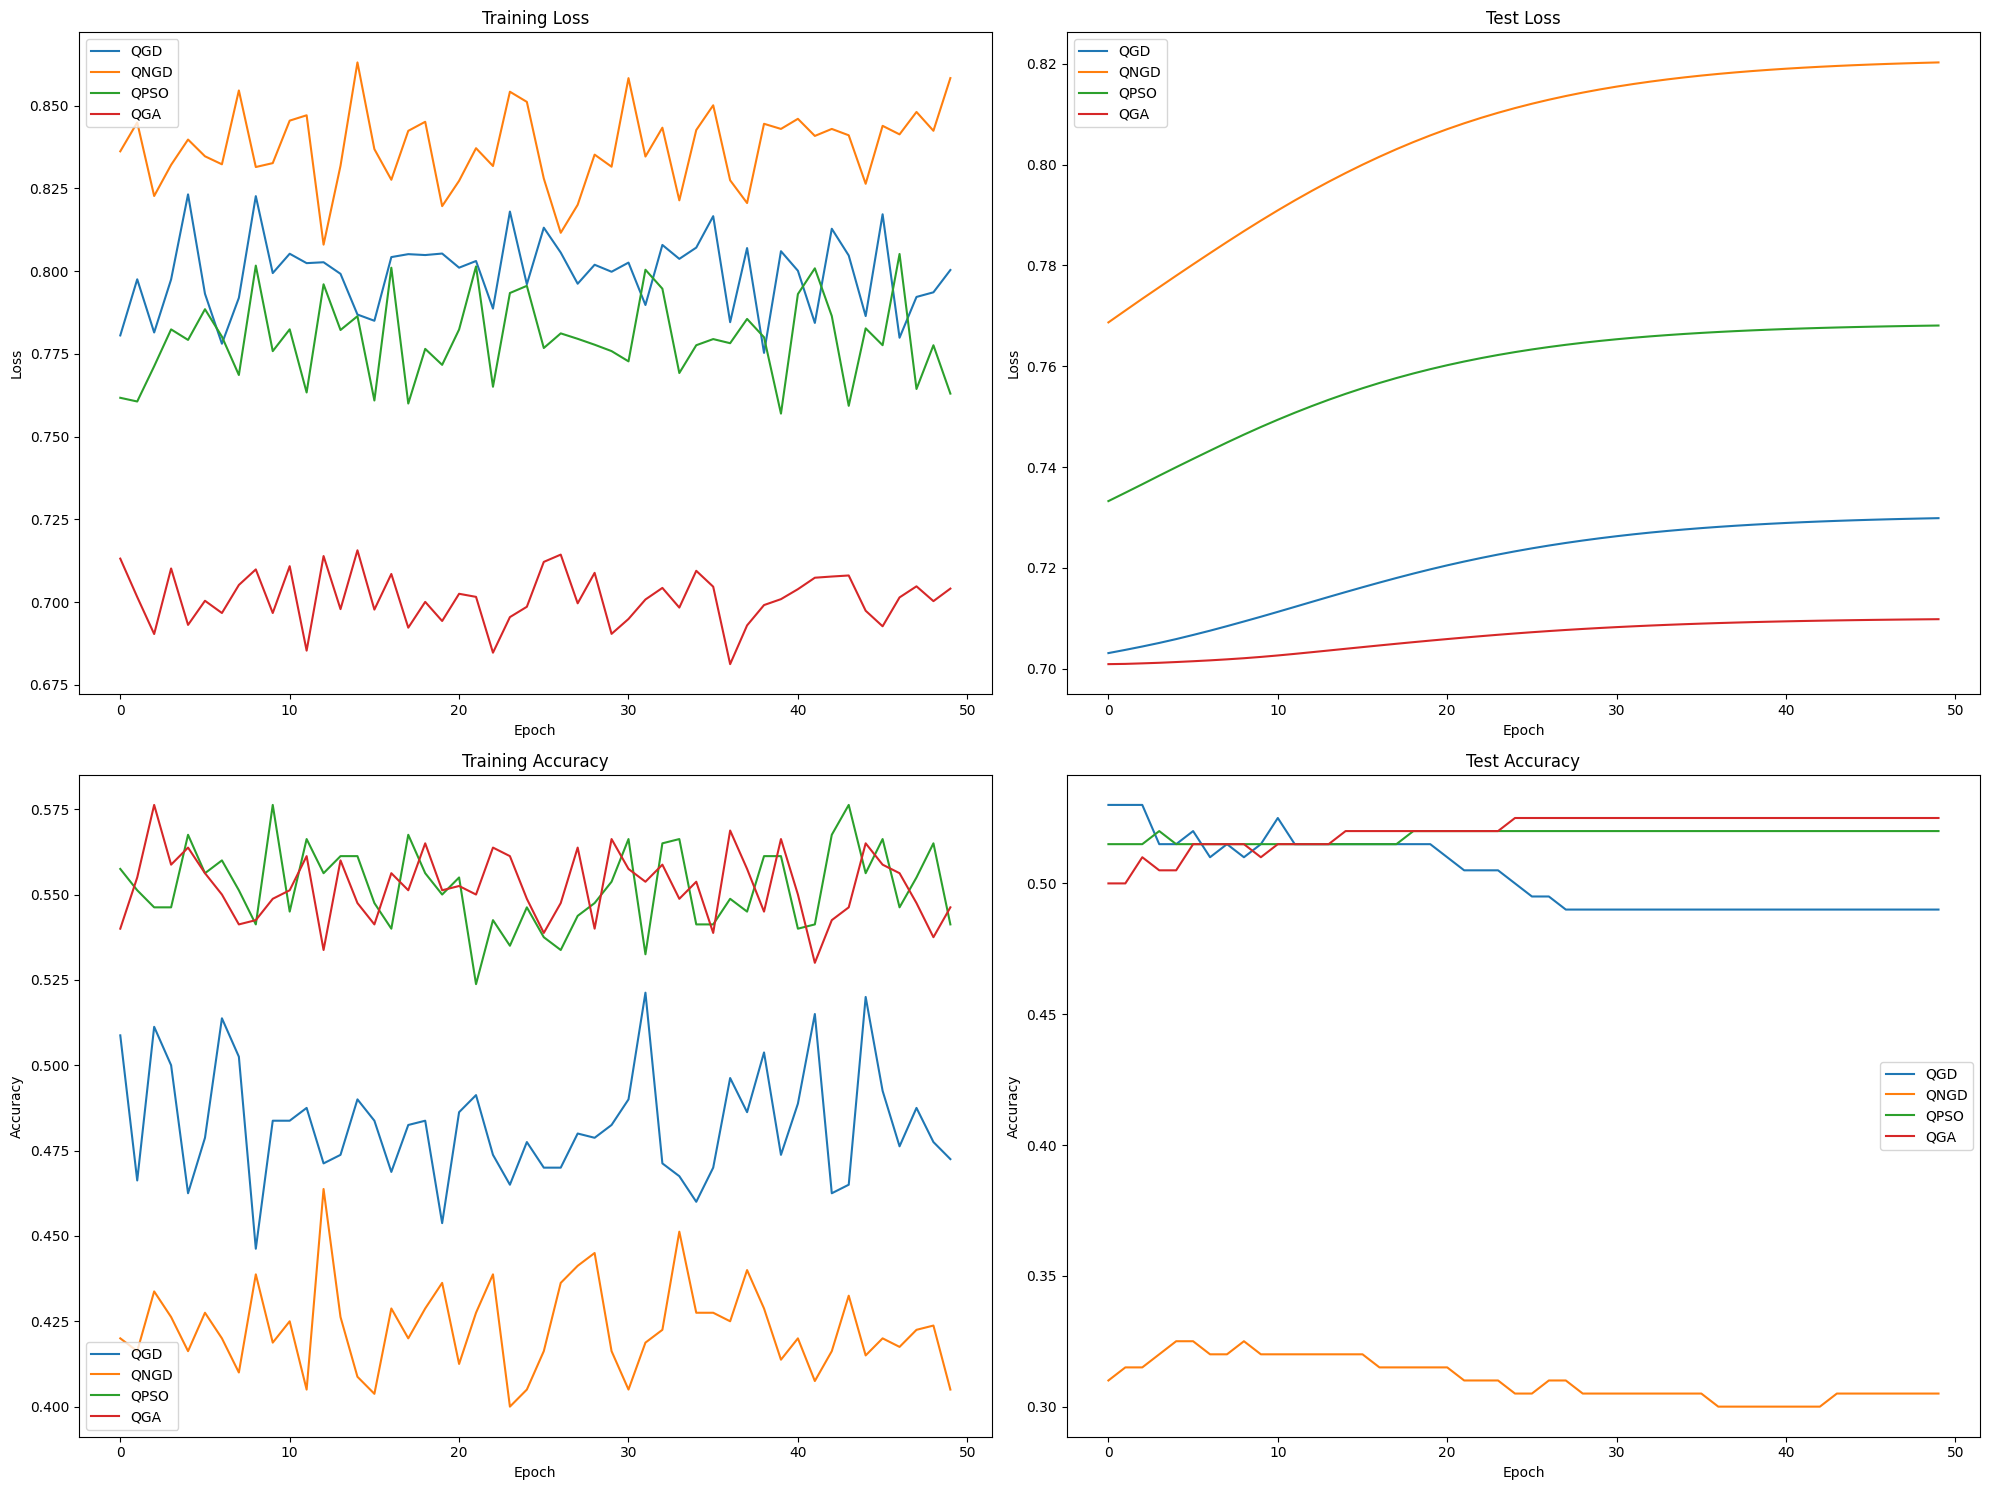


Training Times:
QGD: 3.24 seconds
QNGD: 5.43 seconds
QPSO: 3.26 seconds
QGA: 3.22 seconds

Final Results:
QGD:
  Final Train Loss: 0.8004
  Final Test Loss: 0.7298
  Final Train Accuracy: 0.4725
  Final Test Accuracy: 0.4900
QNGD:
  Final Train Loss: 0.8583
  Final Test Loss: 0.8203
  Final Train Accuracy: 0.4050
  Final Test Accuracy: 0.3050
QPSO:
  Final Train Loss: 0.7630
  Final Test Loss: 0.7681
  Final Train Accuracy: 0.5413
  Final Test Accuracy: 0.5200
QGA:
  Final Train Loss: 0.7041
  Final Test Loss: 0.7098
  Final Train Accuracy: 0.5463
  Final Test Accuracy: 0.5250


In [29]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

# Configurar el dispositivo de PennyLane para usar el simulador cuántico
dev = qml.device("default.qubit", wires=4)

# Definir el circuito cuántico
@qml.qnode(dev)
def quantum_circuit(params, features):
    # Codificación de características
    for i in range(4):
        qml.RY(features[i], wires=i)

    # Capas parametrizadas
    for layer in range(2):
        for i in range(4):
            qml.RX(params[layer][i][0], wires=i)
            qml.RY(params[layer][i][1], wires=i)
            qml.RZ(params[layer][i][2], wires=i)

        qml.CNOT(wires=[0, 1])
        qml.CNOT(wires=[1, 2])
        qml.CNOT(wires=[2, 3])

    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

# Modelo de red neuronal con Batch Normalization y Dropout
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

# Función para entrenar y evaluar
def train_and_evaluate(model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs):
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Evaluación en conjunto de entrenamiento
        _, predicted = torch.max(outputs.data, 1)
        train_accuracy = (predicted == y_train).sum().item() / y_train.size(0)
        train_accuracies.append(train_accuracy)

        # Evaluación en conjunto de prueba
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            test_losses.append(test_loss.item())

            _, test_predicted = torch.max(test_outputs.data, 1)
            test_accuracy = (test_predicted == y_test).sum().item() / y_test.size(0)
            test_accuracies.append(test_accuracy)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, '
                  f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

    return train_losses, test_losses, train_accuracies, test_accuracies

# Optimizadores Cuánticos
class QuantumGradientDescent(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01):
        defaults = dict(lr=lr)
        super(QuantumGradientDescent, self).__init__(params, defaults)
        self.quantum_params = np.random.randn(2, 4, 3)  # Inicialización de los parámetros cuánticos

    def step(self, closure=None):
        loss = closure() if closure is not None else None

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Calcular el gradiente cuántico
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Actualizar parámetros cuánticos
                self.quantum_params -= group['lr'] * quantum_grad

        return loss

class QuantumNaturalGradientDescent(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01):
        defaults = dict(lr=lr)
        super(QuantumNaturalGradientDescent, self).__init__(params, defaults)
        self.quantum_params = np.random.randn(2, 4, 3)  # Inicialización de los parámetros cuánticos

    def step(self, closure=None):
        loss = closure() if closure is not None else None

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Calcular el gradiente cuántico
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Actualizar parámetros cuánticos utilizando el gradiente natural
                fisher_information_matrix = np.eye(self.quantum_params.size)  # Matriz de información de Fisher (simplificada)
                inv_fisher_information = np.linalg.inv(fisher_information_matrix)
                natural_grad = np.dot(inv_fisher_information, quantum_grad.flatten()).reshape(self.quantum_params.shape)

                self.quantum_params -= group['lr'] * natural_grad

        return loss

class QuantumParticleSwarmOptimization(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01):
        defaults = dict(lr=lr)
        super(QuantumParticleSwarmOptimization, self).__init__(params, defaults)
        self.quantum_params = np.random.randn(2, 4, 3)  # Inicialización de los parámetros cuánticos
        self.best_position = np.copy(self.quantum_params)
        self.best_score = float('inf')
        self.velocity = np.zeros_like(self.quantum_params)

    def step(self, closure=None):
        loss = closure() if closure is not None else None

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Calcular el gradiente cuántico
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Actualizar velocidad y posición (parámetros cuánticos)
                self.velocity = 0.5 * self.velocity + 0.5 * quantum_grad
                self.quantum_params -= group['lr'] * self.velocity

                # Evaluar la nueva posición
                if loss is not None:
                    score = loss.item()
                    if score < self.best_score:
                        self.best_score = score
                        self.best_position = np.copy(self.quantum_params)

        return loss

class QuantumGeneticAlgorithm(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01, mutation_rate=0.01, crossover_rate=0.7):
        defaults = dict(lr=lr)
        super(QuantumGeneticAlgorithm, self).__init__(params, defaults)
        self.quantum_params = np.random.randn(2, 4, 3)  # Inicialización de los parámetros cuánticos
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def step(self, closure=None):
        loss = closure() if closure is not None else None

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Calcular el gradiente cuántico
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Aplicar operadores genéticos
                if np.random.rand() < self.crossover_rate:
                    crossover_point = np.random.randint(1, self.quantum_params.size - 1)
                    flat_params = self.quantum_params.flatten()
                    flat_grad = quantum_grad.flatten()
                    flat_params[:crossover_point], flat_grad[:crossover_point] = flat_grad[:crossover_point], flat_params[:crossover_point]
                    self.quantum_params = flat_params.reshape(self.quantum_params.shape)

                mutation_mask = np.random.rand(*self.quantum_params.shape) < self.mutation_rate
                self.quantum_params += mutation_mask * np.random.randn(*self.quantum_params.shape) * group['lr']

        return loss

# Generación de datos sintéticos
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conversión a tensores de PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# Parámetros del modelo
input_size = 20
hidden_size = 10
num_classes = 2
learning_rate = 0.01
epochs = 50

# Inicialización de modelos y optimizadores
models = {
    'QGD': (NeuralNetwork(input_size, hidden_size, num_classes),
            lambda params: QuantumGradientDescent(params, lr=learning_rate)),
    'QNGD': (NeuralNetwork(input_size, hidden_size, num_classes),
             lambda params: QuantumNaturalGradientDescent(params, lr=learning_rate)),
    'QPSO': (NeuralNetwork(input_size, hidden_size, num_classes),
             lambda params: QuantumParticleSwarmOptimization(params, lr=learning_rate)),
    'QGA': (NeuralNetwork(input_size, hidden_size, num_classes),
            lambda params: QuantumGeneticAlgorithm(params, lr=learning_rate))
}

criterion = nn.CrossEntropyLoss()

# Entrenamiento y evaluación
results = {}
for name, (model, opt_class) in models.items():
    print(f"\nTraining with {name} optimizer:")
    optimizer = opt_class(model.parameters())
    start_time = time.time()
    train_losses, test_losses, train_accuracies, test_accuracies = train_and_evaluate(
        model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs)
    end_time = time.time()

    results[name] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'train_accuracies': train_accuracies,
        'test_accuracies': test_accuracies,
        'time': end_time - start_time
    }

# Visualización de resultados
plt.figure(figsize=(20, 15))

# Gráfico de pérdida de entrenamiento
plt.subplot(2, 2, 1)
for name, data in results.items():
    plt.plot(data['train_losses'], label=name)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de pérdida de prueba
plt.subplot(2, 2, 2)
for name, data in results.items():
    plt.plot(data['test_losses'], label=name)
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de precisión de entrenamiento
plt.subplot(2, 2, 3)
for name, data in results.items():
    plt.plot(data['train_accuracies'], label=name)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de precisión de prueba
plt.subplot(2, 2, 4)
for name, data in results.items():
    plt.plot(data['test_accuracies'], label=name)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir tiempos de entrenamiento
print("\nTraining Times:")
for name, data in results.items():
    print(f"{name}: {data['time']:.2f} seconds")
# Análisis final
print("\nFinal Results:")
for name, data in results.items():
    print(f"{name}:")
    print(f"  Final Train Loss: {data['train_losses'][-1]:.4f}")
    print(f"  Final Test Loss: {data['test_losses'][-1]:.4f}")
    print(f"  Final Train Accuracy: {data['train_accuracies'][-1]:.4f}")
    print(f"  Final Test Accuracy: {data['test_accuracies'][-1]:.4f}")


## Resultados 4


Training with QGD optimizer:
Epoch [10/50], Train Loss: 0.7779, Test Loss: 0.7295, Train Accuracy: 0.4487, Test Accuracy: 0.4150
Epoch [20/50], Train Loss: 0.7432, Test Loss: 0.7396, Train Accuracy: 0.4913, Test Accuracy: 0.4200
Epoch [30/50], Train Loss: 0.7663, Test Loss: 0.7449, Train Accuracy: 0.4612, Test Accuracy: 0.4350
Epoch [40/50], Train Loss: 0.7634, Test Loss: 0.7472, Train Accuracy: 0.4888, Test Accuracy: 0.4350
Epoch [50/50], Train Loss: 0.7619, Test Loss: 0.7480, Train Accuracy: 0.4637, Test Accuracy: 0.4350

Training with QNGD optimizer:
Epoch [10/50], Train Loss: 0.8019, Test Loss: 0.7308, Train Accuracy: 0.4750, Test Accuracy: 0.4950
Epoch [20/50], Train Loss: 0.7766, Test Loss: 0.7402, Train Accuracy: 0.5075, Test Accuracy: 0.4850
Epoch [30/50], Train Loss: 0.7933, Test Loss: 0.7456, Train Accuracy: 0.4988, Test Accuracy: 0.4750
Epoch [40/50], Train Loss: 0.8384, Test Loss: 0.7480, Train Accuracy: 0.4587, Test Accuracy: 0.4750
Epoch [50/50], Train Loss: 0.7975, Test

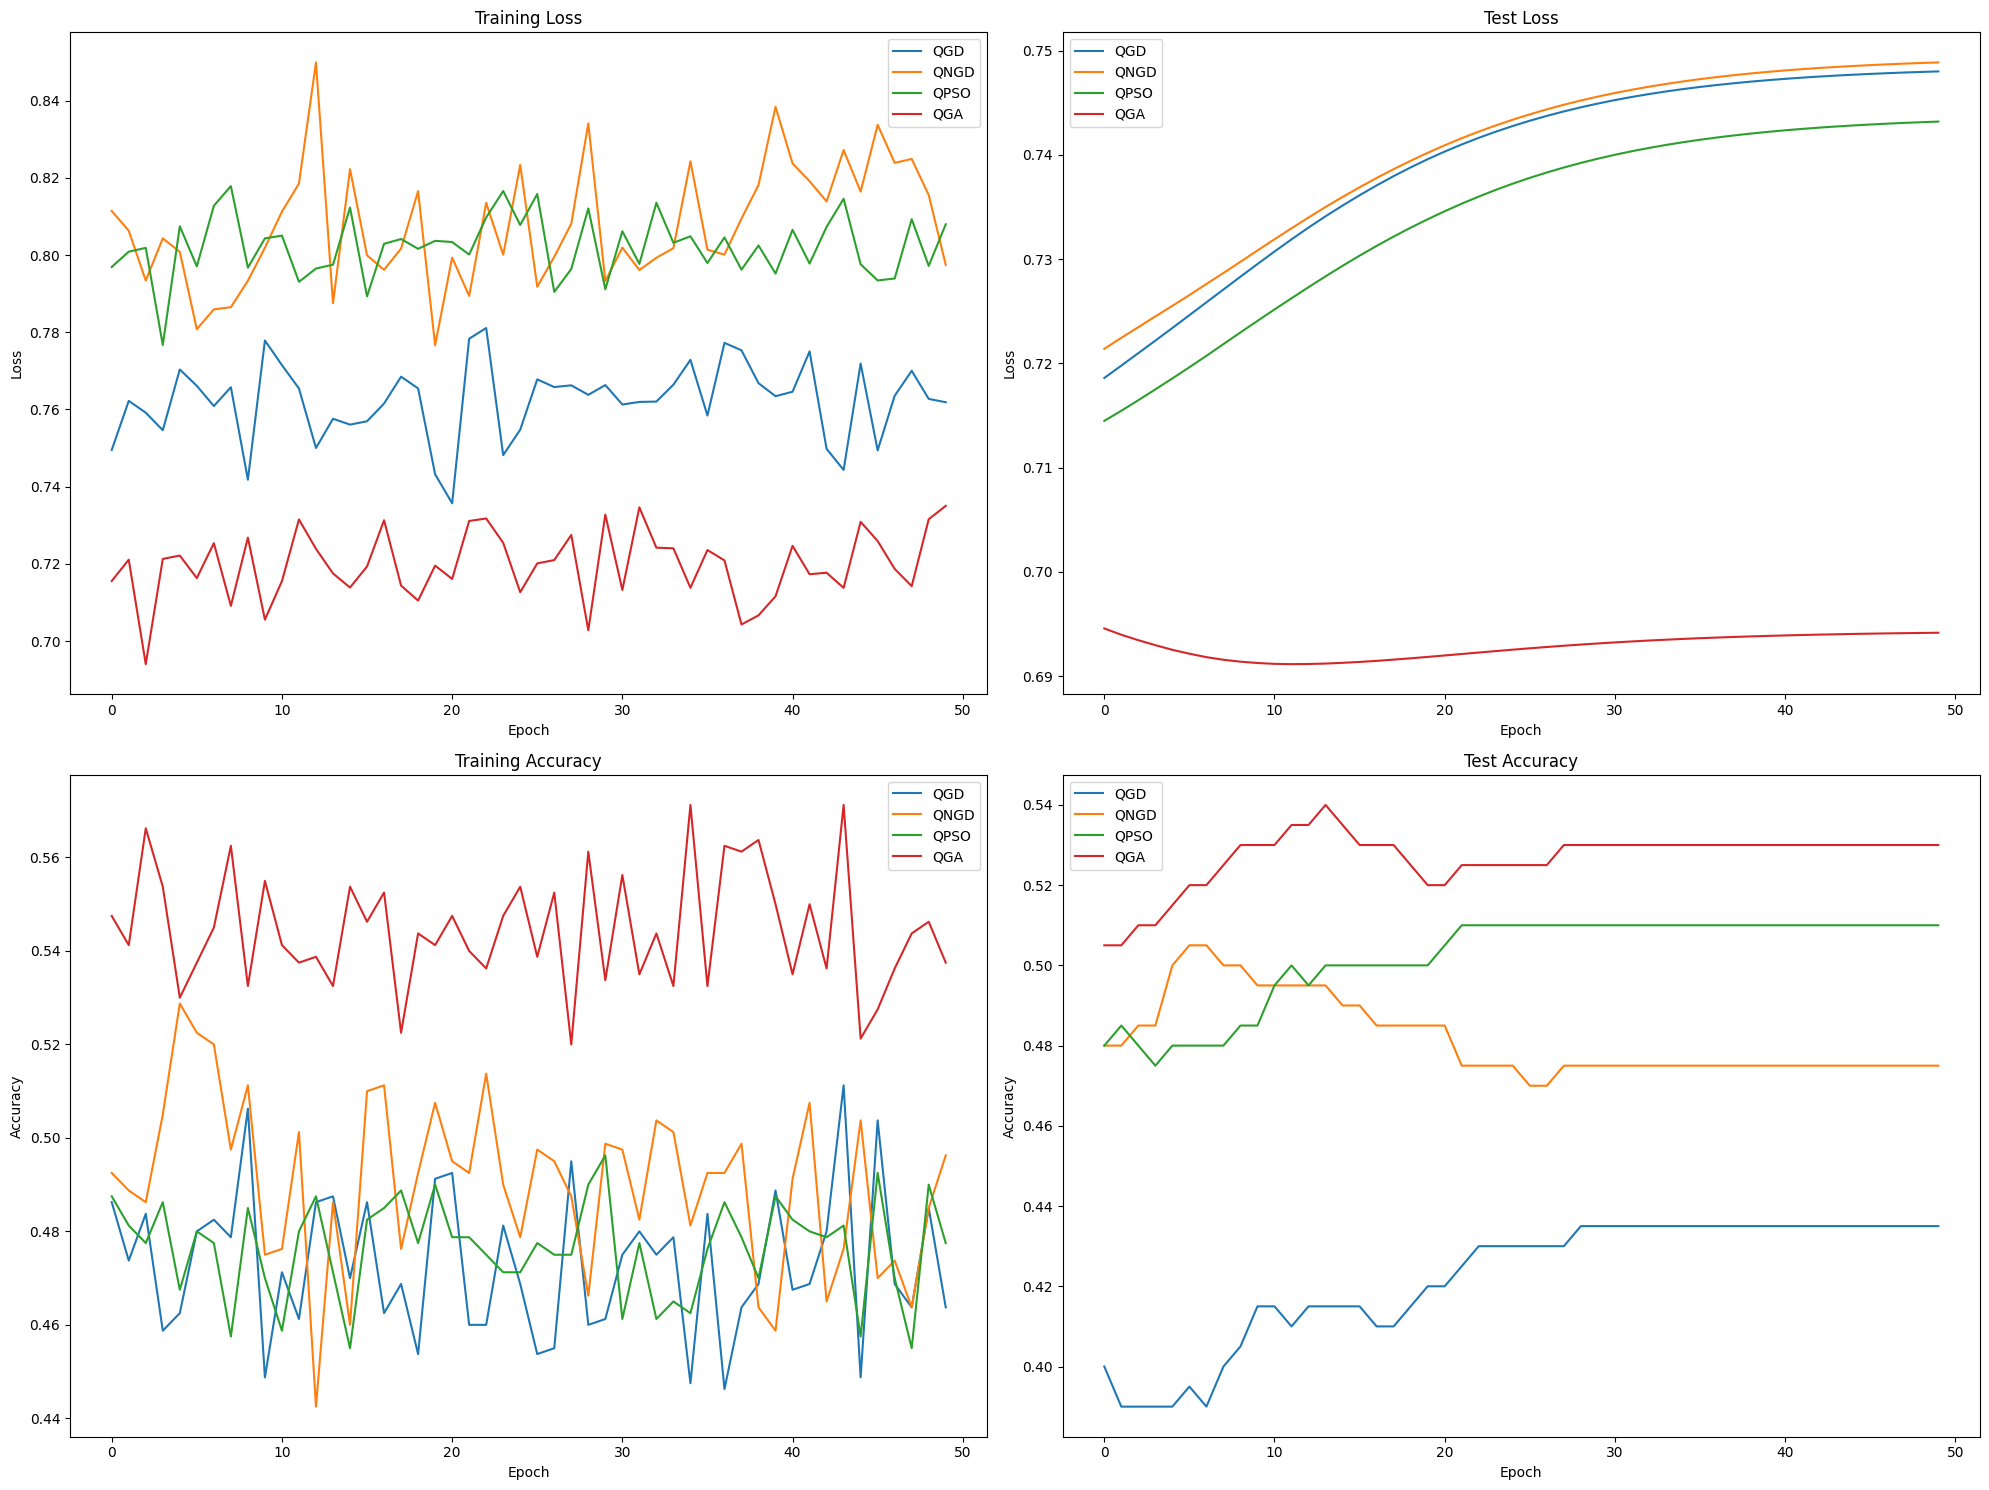


Training Times:
QGD: 6.30 seconds
QNGD: 5.44 seconds
QPSO: 3.29 seconds
QGA: 3.25 seconds

Final Results:
QGD:
  Final Train Loss: 0.7619
  Final Test Loss: 0.7480
  Final Train Accuracy: 0.4637
  Final Test Accuracy: 0.4350
QNGD:
  Final Train Loss: 0.7975
  Final Test Loss: 0.7489
  Final Train Accuracy: 0.4963
  Final Test Accuracy: 0.4750
QPSO:
  Final Train Loss: 0.8080
  Final Test Loss: 0.7432
  Final Train Accuracy: 0.4775
  Final Test Accuracy: 0.5100
QGA:
  Final Train Loss: 0.7350
  Final Test Loss: 0.6942
  Final Train Accuracy: 0.5375
  Final Test Accuracy: 0.5300


In [30]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

# Configurar el dispositivo de PennyLane para usar el simulador cuántico
dev = qml.device("default.qubit", wires=4)

# Definir el circuito cuántico
@qml.qnode(dev)
def quantum_circuit(params, features):
    # Codificación de características
    for i in range(4):
        qml.RY(features[i], wires=i)

    # Capas parametrizadas
    for layer in range(2):
        for i in range(4):
            qml.RX(params[layer][i][0], wires=i)
            qml.RY(params[layer][i][1], wires=i)
            qml.RZ(params[layer][i][2], wires=i)

        qml.CNOT(wires=[0, 1])
        qml.CNOT(wires=[1, 2])
        qml.CNOT(wires=[2, 3])

    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

# Modelo de red neuronal con Batch Normalization y Dropout
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

# Función para entrenar y evaluar
def train_and_evaluate(model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs):
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Evaluación en conjunto de entrenamiento
        _, predicted = torch.max(outputs.data, 1)
        train_accuracy = (predicted == y_train).sum().item() / y_train.size(0)
        train_accuracies.append(train_accuracy)

        # Evaluación en conjunto de prueba
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            test_losses.append(test_loss.item())

            _, test_predicted = torch.max(test_outputs.data, 1)
            test_accuracy = (test_predicted == y_test).sum().item() / y_test.size(0)
            test_accuracies.append(test_accuracy)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, '
                  f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

    return train_losses, test_losses, train_accuracies, test_accuracies

# Optimizadores Cuánticos
class QuantumGradientDescent(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01):
        defaults = dict(lr=lr)
        super(QuantumGradientDescent, self).__init__(params, defaults)
        self.quantum_params = np.random.randn(2, 4, 3)  # Inicialización de los parámetros cuánticos

    def step(self, closure=None):
        loss = closure() if closure is not None else None

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Calcular el gradiente cuántico
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Actualizar parámetros cuánticos
                self.quantum_params -= group['lr'] * quantum_grad

        return loss

class QuantumNaturalGradientDescent(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01):
        defaults = dict(lr=lr)
        super(QuantumNaturalGradientDescent, self).__init__(params, defaults)
        self.quantum_params = np.random.randn(2, 4, 3)  # Inicialización de los parámetros cuánticos

    def step(self, closure=None):
        loss = closure() if closure is not None else None

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Calcular el gradiente cuántico
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Actualizar parámetros cuánticos utilizando el gradiente natural
                fisher_information_matrix = np.eye(self.quantum_params.size)  # Matriz de información de Fisher (simplificada)
                inv_fisher_information = np.linalg.inv(fisher_information_matrix)
                natural_grad = np.dot(inv_fisher_information, quantum_grad.flatten()).reshape(self.quantum_params.shape)

                self.quantum_params -= group['lr'] * natural_grad

        return loss

class QuantumParticleSwarmOptimization(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01):
        defaults = dict(lr=lr)
        super(QuantumParticleSwarmOptimization, self).__init__(params, defaults)
        self.quantum_params = np.random.randn(2, 4, 3)  # Inicialización de los parámetros cuánticos
        self.best_position = np.copy(self.quantum_params)
        self.best_score = float('inf')
        self.velocity = np.zeros_like(self.quantum_params)

    def step(self, closure=None):
        loss = closure() if closure is not None else None

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Calcular el gradiente cuántico
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Actualizar velocidad y posición (parámetros cuánticos)
                self.velocity = 0.5 * self.velocity + 0.5 * quantum_grad
                self.quantum_params -= group['lr'] * self.velocity

                # Evaluar la nueva posición
                if loss is not None:
                    score = loss.item()
                    if score < self.best_score:
                        self.best_score = score
                        self.best_position = np.copy(self.quantum_params)

        return loss

class QuantumGeneticAlgorithm(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01, mutation_rate=0.01, crossover_rate=0.7):
        defaults = dict(lr=lr)
        super(QuantumGeneticAlgorithm, self).__init__(params, defaults)
        self.quantum_params = np.random.randn(2, 4, 3)  # Inicialización de los parámetros cuánticos
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def step(self, closure=None):
        loss = closure() if closure is not None else None

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data

                # Calcular el gradiente cuántico
                features = d_p.numpy().flatten()[:4]
                if len(features) < 4:
                    features = np.pad(features, (0, 4 - len(features)), 'constant')
                quantum_grad = np.array(quantum_circuit(self.quantum_params, features))
                quantum_grad = np.tile(quantum_grad, (2, 4, 3))[:2, :4, :3]

                # Aplicar operadores genéticos
                if np.random.rand() < self.crossover_rate:
                    crossover_point = np.random.randint(1, self.quantum_params.size - 1)
                    flat_params = self.quantum_params.flatten()
                    flat_grad = quantum_grad.flatten()
                    flat_params[:crossover_point], flat_grad[:crossover_point] = flat_grad[:crossover_point], flat_params[:crossover_point]
                    self.quantum_params = flat_params.reshape(self.quantum_params.shape)

                mutation_mask = np.random.rand(*self.quantum_params.shape) < self.mutation_rate
                self.quantum_params += mutation_mask * np.random.randn(*self.quantum_params.shape) * group['lr']

        return loss

# Generación de datos sintéticos
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conversión a tensores de PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# Parámetros del modelo
input_size = 20
hidden_size = 10
num_classes = 2
learning_rate = 0.01
epochs = 50

# Inicialización de modelos y optimizadores
models = {
    'QGD': (NeuralNetwork(input_size, hidden_size, num_classes),
            lambda params: QuantumGradientDescent(params, lr=learning_rate)),
    'QNGD': (NeuralNetwork(input_size, hidden_size, num_classes),
             lambda params: QuantumNaturalGradientDescent(params, lr=learning_rate)),
    'QPSO': (NeuralNetwork(input_size, hidden_size, num_classes),
             lambda params: QuantumParticleSwarmOptimization(params, lr=learning_rate)),
    'QGA': (NeuralNetwork(input_size, hidden_size, num_classes),
            lambda params: QuantumGeneticAlgorithm(params, lr=learning_rate))
}

criterion = nn.CrossEntropyLoss()

# Entrenamiento y evaluación
results = {}
for name, (model, opt_class) in models.items():
    print(f"\nTraining with {name} optimizer:")
    optimizer = opt_class(model.parameters())
    start_time = time.time()
    train_losses, test_losses, train_accuracies, test_accuracies = train_and_evaluate(
        model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs)
    end_time = time.time()

    results[name] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'train_accuracies': train_accuracies,
        'test_accuracies': test_accuracies,
        'time': end_time - start_time
    }

# Visualización de resultados
plt.figure(figsize=(20, 15))

# Gráfico de pérdida de entrenamiento
plt.subplot(2, 2, 1)
for name, data in results.items():
    plt.plot(data['train_losses'], label=name)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de pérdida de prueba
plt.subplot(2, 2, 2)
for name, data in results.items():
    plt.plot(data['test_losses'], label=name)
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de precisión de entrenamiento
plt.subplot(2, 2, 3)
for name, data in results.items():
    plt.plot(data['train_accuracies'], label=name)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de precisión de prueba
plt.subplot(2, 2, 4)
for name, data in results.items():
    plt.plot(data['test_accuracies'], label=name)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir tiempos de entrenamiento
print("\nTraining Times:")
for name, data in results.items():
    print(f"{name}: {data['time']:.2f} seconds")

# Análisis final
print("\nFinal Results:")
for name, data in results.items():
    print(f"{name}:")
    print(f"  Final Train Loss: {data['train_losses'][-1]:.4f}")
    print(f"  Final Test Loss: {data['test_losses'][-1]:.4f}")
    print(f"  Final Train Accuracy: {data['train_accuracies'][-1]:.4f}")
    print(f"  Final Test Accuracy: {data['test_accuracies'][-1]:.4f}")
